In [53]:
#1. 21년 서울시 구별 종사자수

import numpy as np 
import pandas as pd

df= pd.read_csv("../data/seoul_gu_work.csv")
work = pd.pivot_table(data=df, index=["구"], values=["총종사자수"]).sort_values('총종사자수',ascending=False)
work

총종사자수
구             
강남구   801419.0
서초구   487976.0
영등포구  435017.0
송파구   400781.0
중구    386564.0
강서구   290473.0
마포구   279788.0
종로구   275063.0
금천구   255449.0
구로구   240689.0
성동구   203221.0
강동구   157465.0
용산구   152605.0
동대문구  146383.0
양천구   133776.0
노원구   133398.0
광진구   129707.0
관악구   128417.0
성북구   124004.0
서대문구  118256.0
중랑구   113144.0
동작구   109281.0
은평구   109031.0
강북구    80222.0
도봉구    79097.0

In [54]:
#지도 시각화

import folium
import json

geo_path = "/home/jongchanjang/amr_ws/eda/data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))
seoul_district = pd.read_csv('../data/gu_name.csv' ,  encoding='cp949')

my_map = folium.Map(location=[37.57, 126.992], zoom_start=11.3)

folium.Choropleth(
    geo_data=geo_str,
    data=work["총종사자수"],
    columns=[work.index, work["총종사자수"]],
    key_on="feature.id",
    fill_color="PuRd",
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name="21년 서울시 구별 종사자수",
).add_to(my_map)

for idx, row in seoul_district.iterrows():
        text_location = [row['Y'], row['X']]
        text = row['시군구명']
        folium.Marker(location=text_location, popup=text,
                      icon=folium.DivIcon(icon_size=(50,20),icon_anchor=(16,0),
                              html=f"""<div style="font-family: arial; font-size: 1.2em ;color: black">{text}</div>""")
                      ).add_to(my_map)

my_map

In [3]:
#2. 21년 서울시 구별 1년 평균 근로소득 (원천징수지 기준)

df2= pd.read_csv("../data/seoul_money(work).csv" ,  encoding='cp949')
money = pd.pivot_table(data=df2, index=["구"], values=["1인당금액(백만원)"]).sort_values('1인당금액(백만원)',ascending=False)
money

1인당금액(백만원)
구               
종로구    57.042458
영등포구   56.277545
중구     54.939752
강남구    47.918872
서초구    47.871242
용산구    47.331174
서대문구   42.043906
강동구    41.359432
강서구    40.587155
마포구    39.513060
송파구    38.474278
성동구    38.281897
동작구    36.596565
구로구    35.585078
금천구    34.728632
성북구    34.508649
동대문구   34.085311
관악구    33.458269
양천구    32.878383
광진구    32.672721
중랑구    30.669499
노원구    30.045920
은평구    29.779193
강북구    28.110932
도봉구    27.531994

In [4]:
#지도 시각화
my_map2 = folium.Map(location=[37.57, 126.992], zoom_start=11.3)

folium.Choropleth(
    geo_data=geo_str,
    data=money["1인당금액(백만원)"],
    columns=[money.index, money["1인당금액(백만원)"]],
    key_on="feature.id",
    fill_color="PuRd",
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name="21년 서울시 구별 1년 평균 근로소득",
).add_to(my_map2)

for idx, row in seoul_district.iterrows():
        text_location = [row['Y'], row['X']]
        text = row['시군구명']
        folium.Marker(location=text_location, popup=text,
                      icon=folium.DivIcon(icon_size=(50,20),icon_anchor=(16,0),
                              html=f"""<div style="font-family: arial; font-size: 1.2em ;color: black">{text}</div>""")
                      ).add_to(my_map2)

my_map2

/tmp/ipykernel_15633/533763962.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(total["총종사자수"][n],
/tmp/ipykernel_15633/533763962.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total["1인당금액(백만원)"][n] ,
/tmp/ipykernel_15633/533763962.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(total["총종사자수"][n],
/tmp/ipykernel_15633/533763962.py:33: FutureWarning: Series.__getitem__ treating keys as positions is d

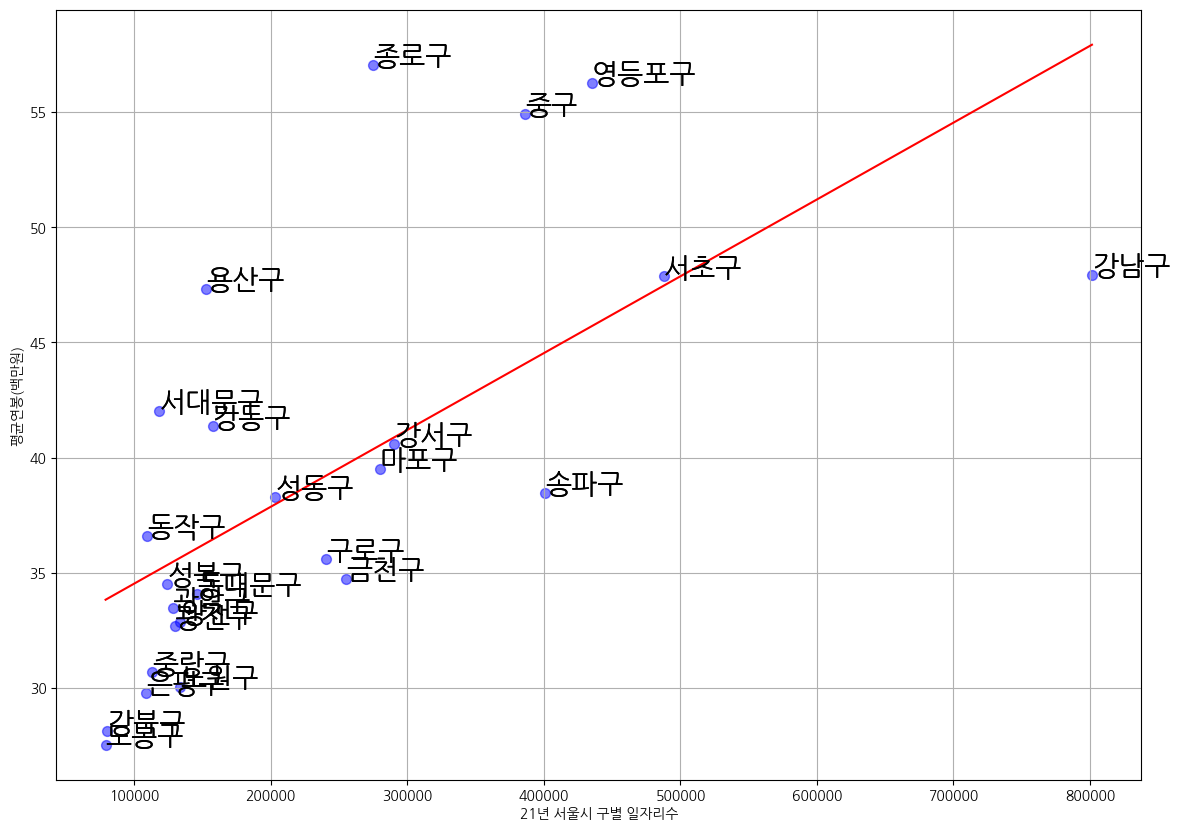

In [61]:
#3. 일자리가 많고 평균연봉이 높은 구는?

import matplotlib.pyplot as plt
import koreanize_matplotlib

gu = pd.pivot_table(data=df, index=["구"], values=["총종사자수"]).sort_values('총종사자수',ascending=False)
total = pd.merge(gu,money,how='outer',on='구').sort_values('1인당금액(백만원)',ascending=False)

def drawGraph():
    plt.figure(figsize=(14,10))
    plt.scatter(x=total["총종사자수"], y=total["1인당금액(백만원)"], color = 'blue' , alpha =0.5 , s=50)
    plt.xlabel("21년 서울시 구별 일자리수")
    plt.ylabel("평균연봉(백만원)")
    plt.grid()

    for n in range(25):
        plt.text(total["총종사자수"][n],
                total["1인당금액(백만원)"][n] ,
                total.index[n], fontsize=20 )
        
    x=np.array(total["총종사자수"])
    y=np.array(total["1인당금액(백만원)"])

    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)

    trendline_x = np.linspace(min(x), max(x), 100)
    trendline_y = polynomial(trendline_x)
    plt.plot(trendline_x, trendline_y, color='red', label='2차 추세선')

    for n in range(25):
        plt.text(total["총종사자수"][n],
                total["1인당금액(백만원)"][n] ,
                total.index[n], fontsize=20 )
        
    plt.show()

drawGraph()

In [6]:
#4. 21년 서울시 구별 1년 평균 근로소득 (거주지 기준)
df4= pd.read_csv("../data/seoul_mony(home).csv" ,  encoding='cp949')
money2 = pd.pivot_table(data=df4, index=["구"], values=["1인당금액(백만원)"]).sort_values('1인당금액(백만원)',ascending=False)
money2

1인당금액(백만원)
구               
강남구    81.053206
서초구    80.510746
용산구    69.795335
송파구    55.703664
성동구    52.498140
종로구    52.233029
마포구    51.249929
중구     49.499323
양천구    49.391500
영등포구   47.450278
서대문구   44.647890
강동구    44.191868
동작구    44.188900
성북구    42.202897
광진구    40.772493
노원구    40.073375
강서구    39.478474
동대문구   37.884712
구로구    37.383095
은평구    36.915161
도봉구    33.944232
관악구    33.653264
중랑구    32.823432
금천구    32.511710
강북구    31.041123

In [7]:
#지도 시각화

my_map3 = folium.Map(location=[37.57, 126.992], zoom_start=11.3)

folium.Choropleth(
    geo_data=geo_str,
    data=money2["1인당금액(백만원)"],
    columns=[money2.index, money2["1인당금액(백만원)"]],
    key_on="feature.id",
    fill_color="PuRd",
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name="21년 서울시 구별 1년 평균 근로소득",
).add_to(my_map3)

for idx, row in seoul_district.iterrows():
        text_location = [row['Y'], row['X']]
        text = row['시군구명']
        folium.Marker(location=text_location, popup=text,
                      icon=folium.DivIcon(icon_size=(50,20),icon_anchor=(16,0),
                              html=f"""<div style="font-family: arial; font-size: 1.2em ;color: black">{text}</div>""")
                      ).add_to(my_map3)

my_map3

In [8]:
#5. 실제로 일하는 곳에서 살고 있느냐?(원천징수지 인원 - 주거지 인원)

total2 = pd.merge(df4,df,how='outer',on='구')

total2['거주인원 대비 총종사자수'] = total2['총종사자수'] / total2['인원 (명)']

pop = pd.pivot_table(data=total2, index=["구"], values=["거주인원 대비 총종사자수"]).sort_values('거주인원 대비 총종사자수',ascending=False)


my_map4 = folium.Map(location=[37.57, 126.992], zoom_start=11.3)

folium.Choropleth(
    geo_data=geo_str,
    data=pop["거주인원 대비 총종사자수"],
    columns=[pop.index, pop["거주인원 대비 총종사자수"]],
    key_on="feature.id",
    fill_color="PuRd",
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name="21년 서울시 구별 거주인원 대비 총종사자수",
).add_to(my_map4)

for idx, row in seoul_district.iterrows():
        text_location = [row['Y'], row['X']]
        text = row['시군구명']
        folium.Marker(location=text_location, popup=text,
                      icon=folium.DivIcon(icon_size=(50,20),icon_anchor=(16,0),
                              html=f"""<div style="font-family: arial; font-size: 1.2em ;color: black">{text}</div>""")
                      ).add_to(my_map4)

my_map4

In [9]:
#7. 16년~21년 서울시 구별 평균소득(주거지)
money_year2s= pd.read_csv("../data/16_21_money(home).csv" ,  encoding='cp949')
money_year2 = pd.pivot_table(data=money_year2s, index=money_year2s.columns[0], values=money_year2s.columns[1:7])
money_year2

2016       2017       2018       2019       2020       2021
구                                                                     
강남구   63.180018  70.288948  69.642773  71.197784  74.687709  81.053206
강동구   34.693920  36.321654  38.071813  40.510556  41.596165  44.191868
강북구   25.896302  27.069900  28.179687  29.282999  29.528033  31.041123
강서구   33.018423  34.824476  36.323785  37.389157  37.465235  39.478474
관악구   28.584082  29.703509  30.757580  31.568164  32.071817  33.653264
광진구   33.765608  35.482179  36.811163  37.734874  38.478333  40.772493
구로구   30.917753  32.497981  33.656607  34.756679  35.411385  37.383095
금천구   26.439974  27.741563  29.066085  30.056806  30.821922  32.511710
노원구   34.260485  35.557192  36.689581  37.681806  38.424518  40.073375
도봉구   29.272528  30.299622  31.141832  31.973436  32.416354  33.944232
동대문구  30.388740  32.130818  33.670211  34.817921  35.699034  37.884712
동작구   36.785711  38.328692  39.738264  40.796757  41.785433  44.188900
마포구   40.748782  42.749632  44.785413  46.733906  48.008979  51.249929
서대문구  36.023711  37.507745  39.471369  41.139151  42.169923  44.647890
서초구   63.203370  68.563794  69.013977  71.177583  74.406403  80.510746
성동구   39.762473  42.410502  44.486890  46.163739  48.168901  52.498140
성북구   35.689005  37.513240  38.461492  39.346934  40.511392  42.202897
송파구   44.854793  46.755214  48.933412  50.591584  52.085112  55.703664
양천구   40.951679  42.799615  44.404440  45.772043  46.834695  49.391500
영등포구  38.135784  39.957890  41.639078  43.278336  44.465457  47.450278
용산구   53.522857  57.264589  58.846350  62.704326  64.923778  69.795335
은평구   30.152095  31.533487  33.076407  34.486272  35.072052  36.915161
종로구   44.569364  46.591874  47.627325  48.704777  49.051739  52.233029
중구    41.081671  43.236590  44.886460  46.202919  47.315930  49.499323
중랑구   26.507618  27.821793  29.018909  30.316187  31.197193  32.823432

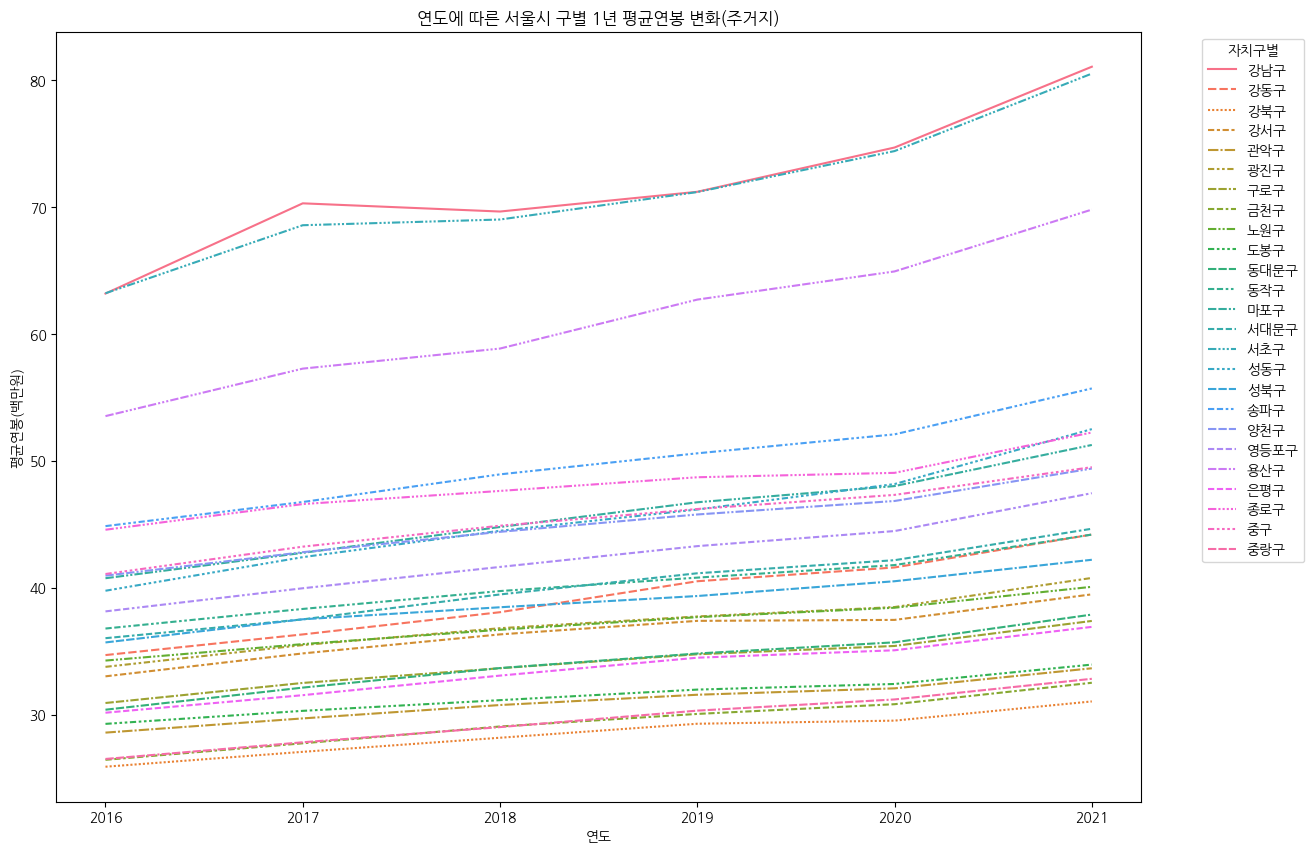

In [10]:
# 16~21년 변화 그래프
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.lineplot(data=money_year2.T)
plt.title('연도에 따른 서울시 구별 1년 평균연봉 변화(주거지)')
plt.xlabel('연도')
plt.ylabel('평균연봉(백만원)')
plt.legend(title='자치구별', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [65]:
# 구별 증감율 그래프
work_plus2 = pd.pivot_table(data=money_year2s, index=money_year2s.columns[0], values=money_year2s.columns[7:8])
work_pl2 = work_plus2.sort_values(by='증감율',ascending=False)
work_pl2

증감율
구              
성동구   32.029362
용산구   30.402857
강남구   28.289305
서초구   27.383630
강동구   27.376403
마포구   25.770456
동대문구  24.666939
영등포구  24.424551
송파구   24.186648
서대문구  23.940288
중랑구   23.826411
금천구   22.964229
은평구   22.429836
구로구   20.911421
광진구   20.751543
양천구   20.609220
중구    20.490042
동작구   20.125177
강북구   19.867009
강서구   19.564990
성북구   18.251816
관악구   17.734281
종로구   17.194917
노원구   16.966748
도봉구   15.959347

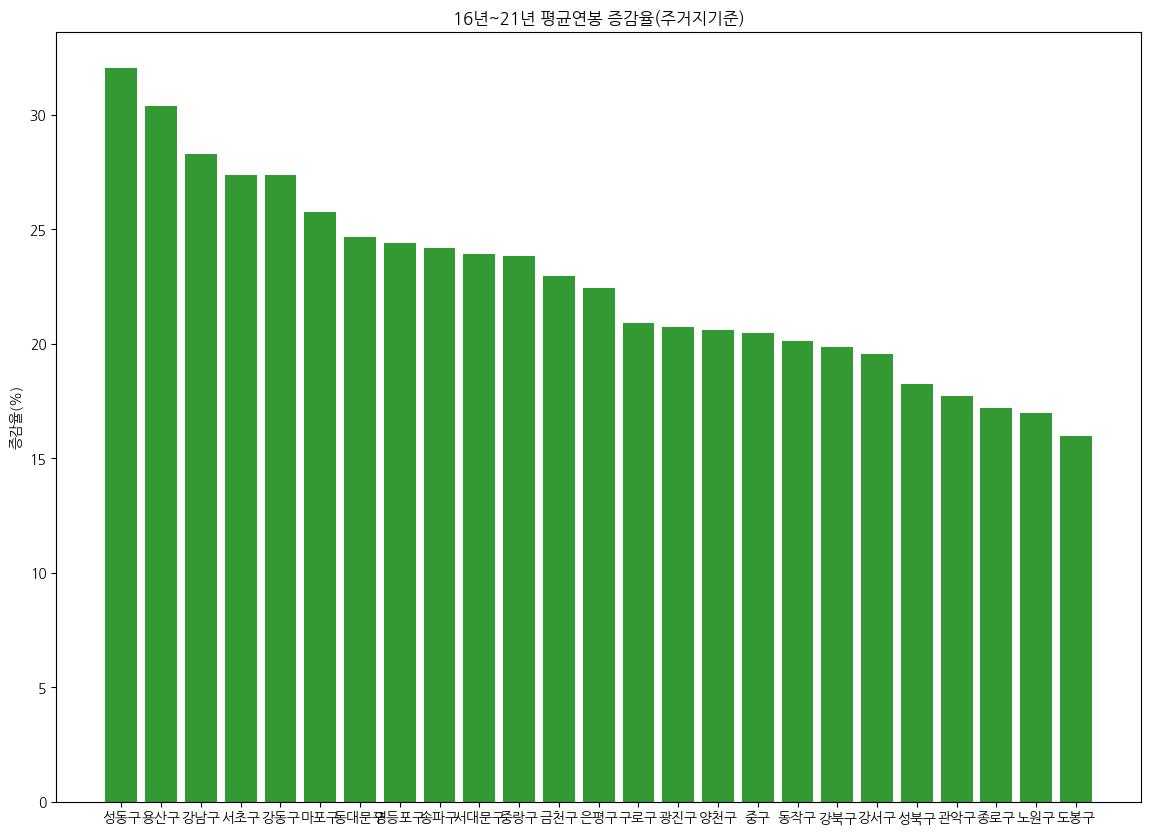

In [66]:
plt.figure(figsize=(14, 10))
plt.bar(x=work_pl2.index , height= work_pl2['증감율'] , color= 'green' , alpha = 0.8)
plt.title('16년~21년 평균연봉 증감율(주거지기준)')
plt.ylabel('증감율(%)')
plt.show()

In [64]:
#지도 시각화

my_map_1 = folium.Map(location=[37.57, 126.992], zoom_start=11.3)

folium.Choropleth(
    geo_data=geo_str,
    data=work_pl2["증감율"],
    columns=[work_pl2.index, work_pl2["증감율"]],
    key_on="feature.id",
    fill_color="PuRd",
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name="16~21년 서울시 구별 평균연봉 증가율",
).add_to(my_map_1)

for idx, row in seoul_district.iterrows():
        text_location = [row['Y'], row['X']]
        text = row['시군구명']
        folium.Marker(location=text_location, popup=text,
                      icon=folium.DivIcon(icon_size=(50,20),icon_anchor=(16,0),
                              html=f"""<div style="font-family: arial; font-size: 1.2em ;color: black">{text}</div>""")
                      ).add_to(my_map_1)

my_map_1

In [12]:
#8. 16년~21년 서울시 구별 평균소득(직장)
money_years= pd.read_csv("../data/16_21_money(work).csv")
money_year = pd.pivot_table(data=money_years, index=money_years.columns[0], values=money_years.columns[1:7])
money_year

2016       2017       2018       2019       2020       2021
구                                                                     
강남구   44.929111  48.068866  50.976926  52.357815  54.464823  57.042458
강동구   25.106125  26.766054  28.072037  29.068948  29.519102  30.669499
강북구   26.710558  27.910852  28.738548  29.235377  29.713776  30.045920
강서구   30.320411  33.209273  34.290548  35.441430  36.620663  38.281897
관악구   37.439792  39.397060  41.630339  42.603915  45.307237  47.331174
광진구   28.896440  30.661845  31.579229  32.235099  32.284488  33.458269
구로구   29.828306  31.163373  32.009602  32.745733  33.298085  34.508649
금천구   33.214280  34.519366  34.752166  36.539819  37.232284  38.474278
노원구   28.707780  30.611113  31.321726  32.109850  33.708762  34.085311
도봉구   24.293655  25.188138  25.960488  26.215982  26.524554  27.531994
동대문구  27.785329  28.704543  29.676983  30.869259  30.917927  32.672721
동작구   44.800407  47.387759  49.590095  50.867413  51.645051  56.277545
마포구   38.722746  39.762040  40.282055  41.124884  41.860784  42.043906
서대문구  31.739586  33.249753  34.828650  36.017258  37.168300  39.513060
서초구   24.807165  26.192148  27.920091  28.862792  29.183097  29.779193
성동구   34.281909  37.240424  39.834232  41.315182  38.255014  40.587155
성북구   30.698538  32.155889  33.385590  34.289972  34.274027  34.728632
송파구   43.298911  43.188531  46.231354  48.395629  49.931552  54.939752
양천구   39.004497  40.277791  41.907868  43.290605  44.947057  47.871242
영등포구  30.149394  31.601728  32.667189  33.524859  33.266736  32.878383
용산구   24.552935  25.115407  26.281873  26.967474  26.493767  28.110932
은평구   28.668990  32.569807  33.927176  35.704156  35.773314  36.596565
종로구   34.171108  36.369759  38.370656  40.155513  42.704576  47.918872
중구    30.306774  37.031603  38.929450  39.528803  39.798677  41.359432
중랑구   29.252959  31.140473  31.916628  33.416059  34.480756  35.585078

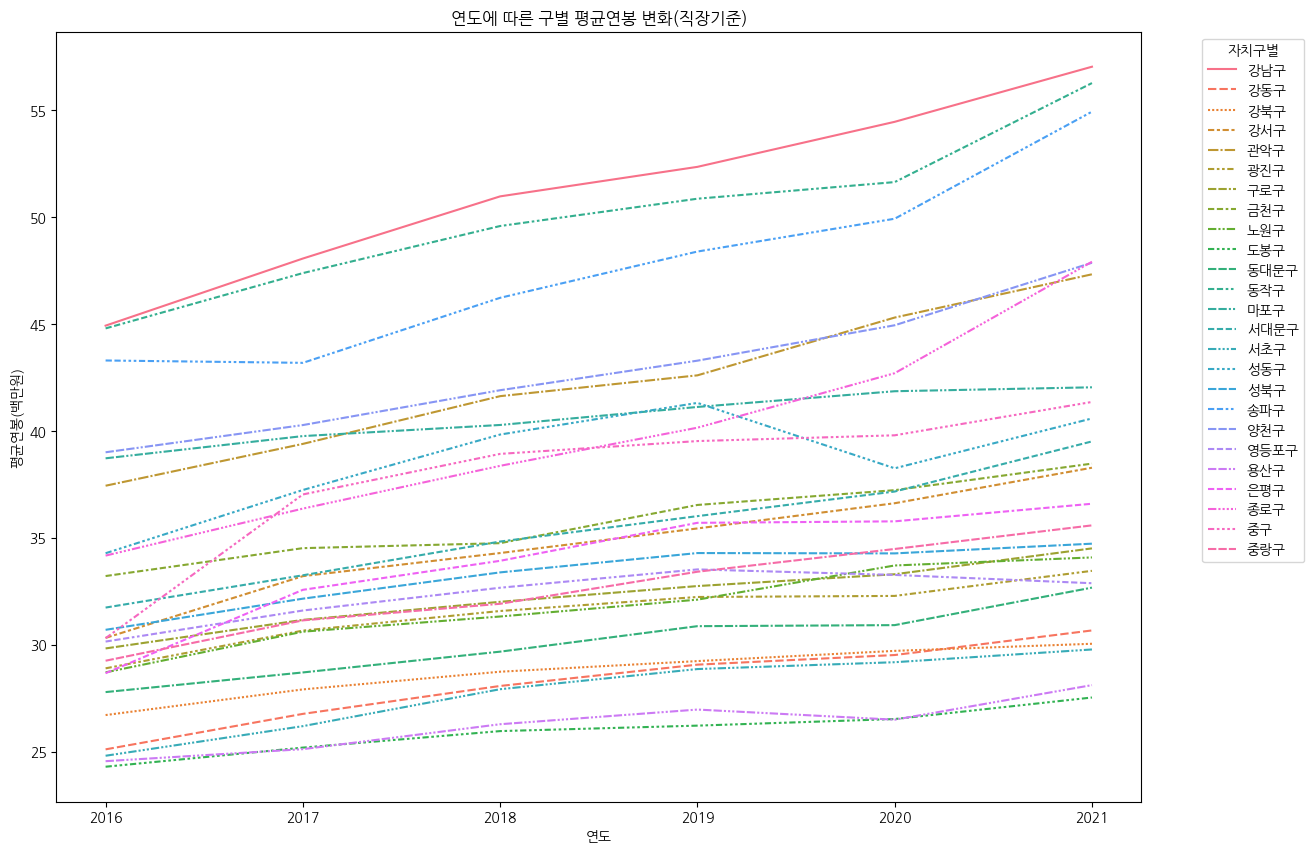

In [13]:
# 구별 그래프 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.lineplot(data=money_year.T)
plt.title('연도에 따른 구별 평균연봉 변화(직장기준)')
plt.xlabel('연도')
plt.ylabel('평균연봉(백만원)')
plt.legend(title='자치구별', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [68]:
# 구별 증감율 그래프
work_plus = pd.pivot_table(data=money_years, index=money_years.columns[0], values=money_years.columns[7:8])
work_pl = work_plus.sort_values(by='증감율',ascending=False)
work_pl

증감율
구              
종로구   40.232130
중구    36.469265
은평구   27.652091
강남구   26.961020
송파구   26.884835
관악구   26.419437
강서구   26.257846
동작구   25.618379
서대문구  24.491418
양천구   22.732621
강동구   22.159427
중랑구   21.646080
서초구   20.042710
노원구   18.731966
성동구   18.392343
동대문구  17.589828
금천구   15.836555
광진구   15.786820
구로구   15.690945
용산구   14.491125
도봉구   13.329978
성북구   13.127967
강북구   12.487054
영등포구   9.051556
마포구    8.576768

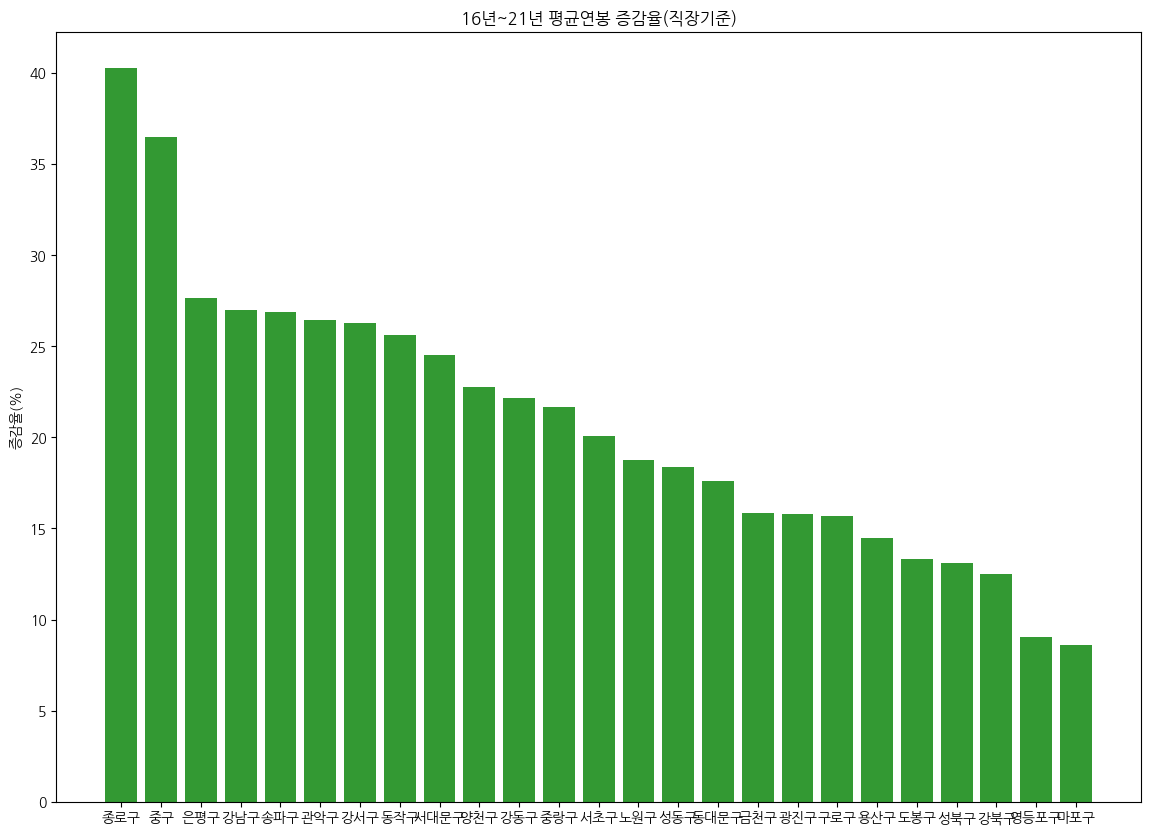

In [67]:
plt.figure(figsize=(14, 10))
plt.bar(x=work_pl.index , height= work_pl['증감율'] , color= 'green' , alpha = 0.8)
plt.title('16년~21년 평균연봉 증감율(직장기준)')
plt.ylabel('증감율(%)')
plt.show()

In [69]:
#지도 시각화

my_map_2 = folium.Map(location=[37.57, 126.992], zoom_start=11.3)

folium.Choropleth(
    geo_data=geo_str,
    data=work_pl["증감율"],
    columns=[work_pl.index, work_pl["증감율"]],
    key_on="feature.id",
    fill_color="PuRd",
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name="16~21년 서울시 구별 평균연봉 증가율",
).add_to(my_map_2)

for idx, row in seoul_district.iterrows():
        text_location = [row['Y'], row['X']]
        text = row['시군구명']
        folium.Marker(location=text_location, popup=text,
                      icon=folium.DivIcon(icon_size=(50,20),icon_anchor=(16,0),
                              html=f"""<div style="font-family: arial; font-size: 1.2em ;color: black">{text}</div>""")
                      ).add_to(my_map_2)

my_map_2

In [15]:
#9. 11년~21년 서울시 구별 일자리수
work_pop= pd.read_csv("../data/11_21_work_pop.csv")
work_year3 = pd.pivot_table(data=work_pop, index=work_pop.columns[0], values=work_pop.columns[1:12])
work_year3

2011      2012      2013      2014      2015      2016      2017  \
구                                                                            
강남구   635129.0  611206.0  617340.0  645060.0  711278.0  689623.0  679047.0   
강동구   115605.0  129430.0  133729.0  139346.0  143061.0  141100.0  146512.0   
강북구    68217.0   69508.0   69468.0   70919.0   69787.0   69768.0   71752.0   
강서구   163250.0  168783.0  178281.0  185361.0  199289.0  207406.0  234394.0   
관악구   108511.0  109069.0  109055.0  112223.0  119180.0  113781.0  115390.0   
광진구   116300.0  117652.0  119965.0  117420.0  123689.0  126937.0  125170.0   
구로구   180377.0  190692.0  193660.0  197894.0  210506.0  211391.0  213468.0   
금천구   198094.0  198565.0  203455.0  214128.0  223058.0  225578.0  228000.0   
노원구   103761.0  102327.0  104525.0  109272.0  114736.0  114999.0  117859.0   
도봉구    62791.0   62820.0   63936.0   66137.0   68669.0   70166.0   70503.0   
동대문구  129592.0  132397.0  132100.0  137079.0  143858.0  144172.0  142842.0   
동작구   100296.0   99628.0  108007.0  105146.0  103915.0  108058.0  110422.0   
마포구   201682.0  212720.0  214621.0  227966.0  252534.0  250605.0  247999.0   
서대문구   94280.0   97686.0   98666.0  102163.0  111615.0  113979.0  111117.0   
서초구   394802.0  376962.0  373954.0  390662.0  439963.0  427227.0  436763.0   
성동구   134727.0  139994.0  143803.0  152831.0  162019.0  165047.0  167308.0   
성북구   101472.0  103054.0  108141.0  107496.0  113893.0  111442.0  108991.0   
송파구   254120.0  257200.0  253215.0  263841.0  302517.0  312661.0  329447.0   
양천구   107890.0  108802.0  109999.0  114617.0  119443.0  117259.0  119943.0   
영등포구  325207.0  335678.0  337027.0  343943.0  362524.0  366625.0  362800.0   
용산구   126714.0  120441.0  127151.0  126073.0  133446.0  129033.0  133260.0   
은평구    78623.0   80672.0   83203.0   84489.0   87693.0   90203.0   88818.0   
종로구   232685.0  232857.0  235681.0  245698.0  269106.0  268309.0  268702.0   
중구    371861.0  386637.0  370070.0  380407.0  423808.0  402892.0  386648.0   
중랑구    92326.0   96613.0   96038.0   99712.0   99241.0  101190.0  102758.0   

          2018      2019      2020      2021  
구                                             
강남구   694136.0  698840.0  838446.0  801419.0  
강동구   145990.0  141770.0  164769.0  157465.0  
강북구    72418.0   73904.0   83276.0   80222.0  
강서구   248204.0  257494.0  280238.0  290473.0  
관악구   113944.0  115329.0  135681.0  128417.0  
광진구   127879.0  126305.0  134230.0  129707.0  
구로구   218070.0  225668.0  239168.0  240689.0  
금천구   234012.0  242686.0  262665.0  255449.0  
노원구   118713.0  116684.0  127454.0  133398.0  
도봉구    74314.0   72939.0   79429.0   79097.0  
동대문구  140748.0  138400.0  148308.0  146383.0  
동작구   112564.0  106159.0  110642.0  109281.0  
마포구   255152.0  247276.0  285083.0  279788.0  
서대문구  109490.0  113819.0  120347.0  118256.0  
서초구   438733.0  438985.0  497678.0  487976.0  
성동구   174819.0  178243.0  196377.0  203221.0  
성북구   108201.0  111005.0  121798.0  124004.0  
송파구   342853.0  341201.0  411898.0  400781.0  
양천구   123311.0  121582.0  130371.0  133776.0  
영등포구  367557.0  373478.0  434698.0  435017.0  
용산구   141216.0  135240.0  154288.0  152605.0  
은평구    90049.0   93631.0  108362.0  109031.0  
종로구   265017.0  260446.0  284570.0  275063.0  
중구    390530.0  392568.0  408064.0  386564.0  
중랑구   103016.0  103345.0  111086.0  113144.0

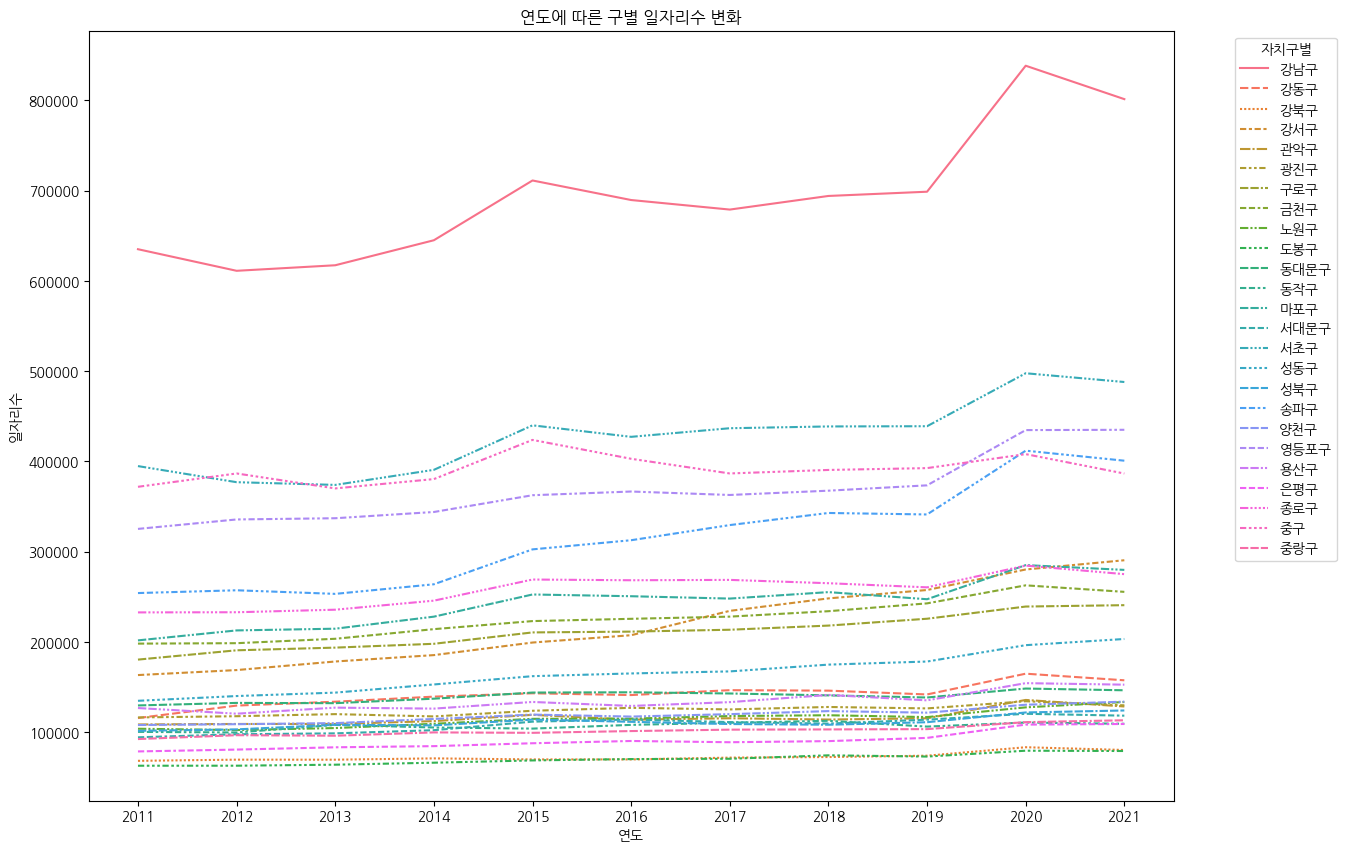

In [16]:
# 구별 그래프 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.lineplot(data=work_year3.T)
plt.title('연도에 따른 구별 일자리수 변화')
plt.xlabel('연도')
plt.ylabel('일자리수')
plt.legend(title='자치구별', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [70]:
# 구별 증감율 그래프
work_plus3 = pd.pivot_table(data=work_pop, index=work_pop.columns[0], values=work_pop.columns[12:13])
work_pl3 = work_plus3.sort_values(by='증감율',ascending=False)
work_pl3

증감율
구              
강서구   77.931394
송파구   57.713285
성동구   50.839104
마포구   38.727303
은평구   38.675706
강동구   36.209507
영등포구  33.766186
구로구   33.436635
금천구   28.953426
노원구   28.562755
강남구   26.182083
도봉구   25.968690
서대문구  25.430632
양천구   23.992956
서초구   23.600184
중랑구   22.548361
성북구   22.205140
용산구   20.432628
관악구   18.344684
종로구   18.212605
강북구   17.598253
동대문구  12.956818
광진구   11.527945
동작구    8.958483
중구     3.953897

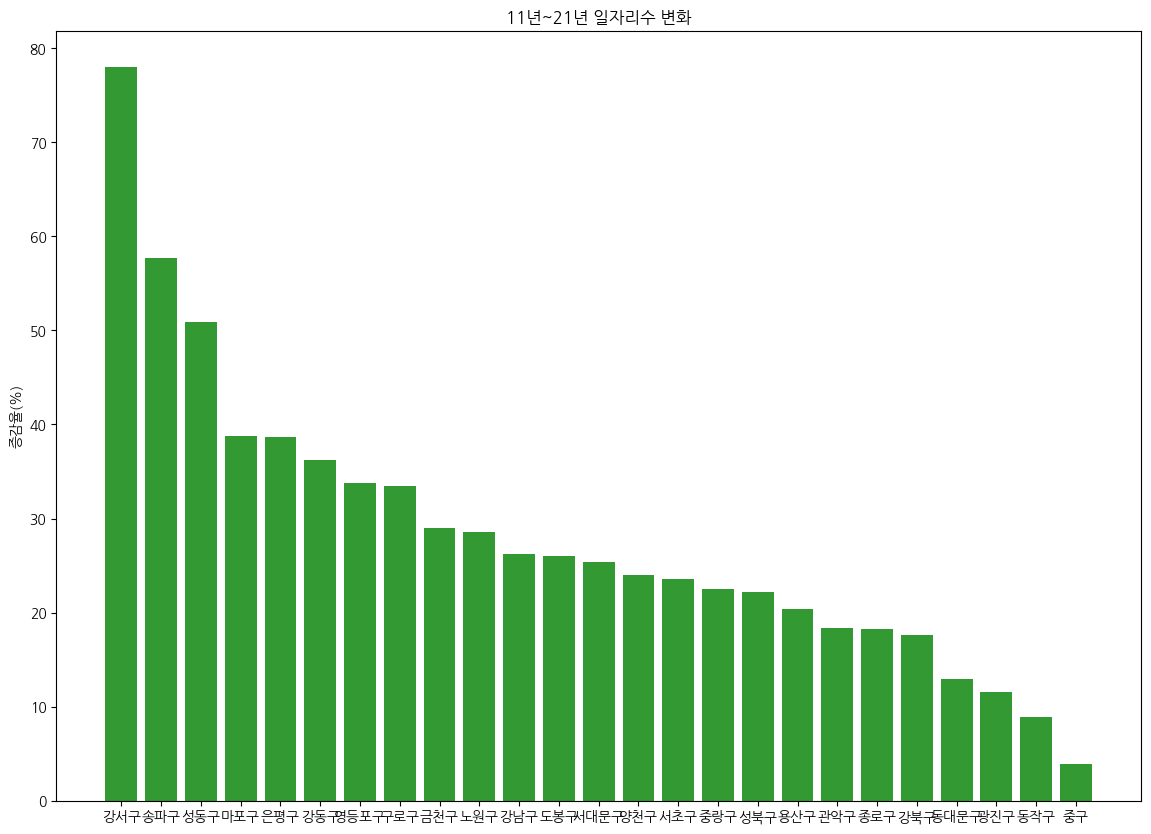

In [71]:
plt.figure(figsize=(14, 10))
plt.bar(x=work_pl3.index , height= work_pl3['증감율'] , color= 'green' , alpha = 0.8)
plt.title('11년~21년 일자리수 변화')
plt.ylabel('증감율(%)')
plt.show()

In [72]:
#지도 시각화

my_map_3 = folium.Map(location=[37.57, 126.992], zoom_start=11.3)

folium.Choropleth(
    geo_data=geo_str,
    data=work_pl3["증감율"],
    columns=[work_pl3.index, work_pl3["증감율"]],
    key_on="feature.id",
    fill_color="PuRd",
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name="16~21년 서울시 구별 평균연봉 증가율",
).add_to(my_map_3)

for idx, row in seoul_district.iterrows():
        text_location = [row['Y'], row['X']]
        text = row['시군구명']
        folium.Marker(location=text_location, popup=text,
                      icon=folium.DivIcon(icon_size=(50,20),icon_anchor=(16,0),
                              html=f"""<div style="font-family: arial; font-size: 1.2em ;color: black">{text}</div>""")
                      ).add_to(my_map_3)

my_map_3

In [18]:
#10. 06년~21년 서울시 구별 아파트 거래량
apart= pd.read_csv("../data/06_21_apart_trade.csv")
apart_trade = pd.pivot_table(data=apart, index=apart.columns[0], values=apart.columns[1:17])
apart_trade

2006     2007    2008    2009    2010    2011    2012    2013  \
구                                                                        
강남구    7388.0   2723.0  2731.0  7420.0  4224.0  4483.0  3035.0  4452.0   
강동구    7982.0   3059.0  3427.0  6426.0  2933.0  3956.0  2760.0  3427.0   
강북구    2908.0   1556.0  1242.0   947.0   585.0  1219.0   851.0  1297.0   
강서구    9158.0   3372.0  4402.0  4120.0  2233.0  3638.0  2236.0  3951.0   
관악구    5119.0   2136.0  2268.0  2037.0  1504.0  2117.0  1540.0  2137.0   
광진구    3517.0    861.0  1190.0  1833.0  1064.0  1290.0   847.0  1257.0   
구로구    7788.0   3753.0  3853.0  3203.0  2141.0  3495.0  1970.0  3470.0   
금천구    2820.0   1519.0  1338.0   925.0   644.0   962.0   745.0  1323.0   
노원구   19918.0  10933.0  7125.0  7135.0  3964.0  6042.0  4527.0  6867.0   
도봉구    8204.0   4862.0  3957.0  3016.0  1840.0  2965.0  2097.0  3269.0   
동대문구   4426.0   2854.0  2343.0  2074.0  1335.0  2097.0  1731.0  2476.0   
동작구    5120.0   1815.0  2086.0  2349.0  1473.0  2299.0  1605.0  2844.0   
마포구    4317.0   2254.0  2344.0  2698.0  1536.0  2272.0  1639.0  2475.0   
서대문구   3973.0   2544.0  2096.0  1662.0  1281.0  1795.0  1126.0  1727.0   
서초구    4293.0   1889.0  2007.0  5776.0  3610.0  3217.0  2220.0  3654.0   
성동구    5018.0   1543.0  1852.0  2462.0  1371.0  1988.0  1152.0  2308.0   
성북구    6148.0   3244.0  2786.0  2966.0  1920.0  3490.0  2281.0  3969.0   
송파구    7430.0   2456.0  3163.0  6719.0  3639.0  4245.0  3827.0  4949.0   
양천구    7576.0   2393.0  2983.0  4909.0  2630.0  3104.0  2201.0  3102.0   
영등포구   6196.0   2408.0  3024.0  3460.0  1820.0  2509.0  1811.0  2696.0   
용산구    2554.0   1140.0   746.0  1400.0   856.0   953.0   704.0   936.0   
은평구    2795.0   1925.0  2580.0  2188.0  1892.0  2038.0  1446.0  2453.0   
종로구     982.0    559.0   583.0   694.0   438.0   645.0   478.0   623.0   
중구     1413.0    739.0   654.0   827.0   550.0   770.0   528.0   884.0   
중랑구    4769.0   3280.0  2567.0  1796.0  1189.0  2033.0  1414.0  2156.0   

        2014     2015     2016     2017    2018    2019    2020    2021  
구                                                                        
강남구   6462.0   8248.0   7556.0   7357.0  4835.0  4672.0  4286.0  3602.0  
강동구   4636.0   6786.0   7072.0   6291.0  4446.0  3837.0  4734.0  2082.0  
강북구   1674.0   2765.0   2080.0   1875.0  2245.0  1201.0  2431.0  1094.0  
강서구   5088.0   9313.0   7794.0   6027.0  5971.0  3391.0  6314.0  3182.0  
관악구   2914.0   4347.0   3510.0   3467.0  3300.0  2159.0  2987.0  1604.0  
광진구   1921.0   2402.0   2444.0   2439.0  1736.0  1690.0  1402.0   821.0  
구로구   4657.0   6653.0   6534.0   5102.0  5040.0  3585.0  5516.0  2820.0  
금천구   1498.0   2189.0   1872.0   1632.0  1739.0  1517.0  1881.0  1250.0  
노원구   8857.0  12534.0  11696.0  10566.0  9522.0  6715.0  9849.0  4434.0  
도봉구   3791.0   5383.0   4993.0   4314.0  4293.0  2767.0  4911.0  2095.0  
동대문구  3695.0   4832.0   4304.0   4007.0  3458.0  2613.0  3627.0  1893.0  
동작구   3424.0   5494.0   4955.0   4246.0  3268.0  2506.0  3224.0  1748.0  
마포구   3255.0   4885.0   5021.0   4154.0  3445.0  2682.0  3227.0  1702.0  
서대문구  2467.0   3642.0   3811.0   3217.0  3143.0  2541.0  3278.0  1675.0  
서초구   5144.0   6367.0   5374.0   5370.0  3891.0  3150.0  3659.0  2527.0  
성동구   3393.0   4868.0   4319.0   4472.0  3479.0  3337.0  3456.0  1683.0  
성북구   4826.0   6847.0   5624.0   5068.0  5773.0  3606.0  4928.0  2724.0  
송파구   5997.0   8237.0   8190.0   8043.0  5904.0  5566.0  5230.0  2396.0  
양천구   4007.0   6483.0   6365.0   4855.0  4693.0  3665.0  4133.0  2061.0  
영등포구  3972.0   5823.0   5019.0   4528.0  3962.0  2942.0  4057.0  2078.0  
용산구   1711.0   2340.0   3698.0   2584.0  2961.0  1461.0  1820.0  1359.0  
은평구   2792.0   3852.0   4028.0   2894.0  3699.0  2231.0  3721.0  1943.0  
종로구    724.0    959.0   1033.0    859.0  1088.0   658.0   870.0   551.0  
중구    1112.0   1866.0   1627.0   1252.0  1487.0   932.0  1164.0   661.0  
중랑구   3679.0   4298.0   3687.0   3278.0  3244.0  2310.0  3079.0  1766.0

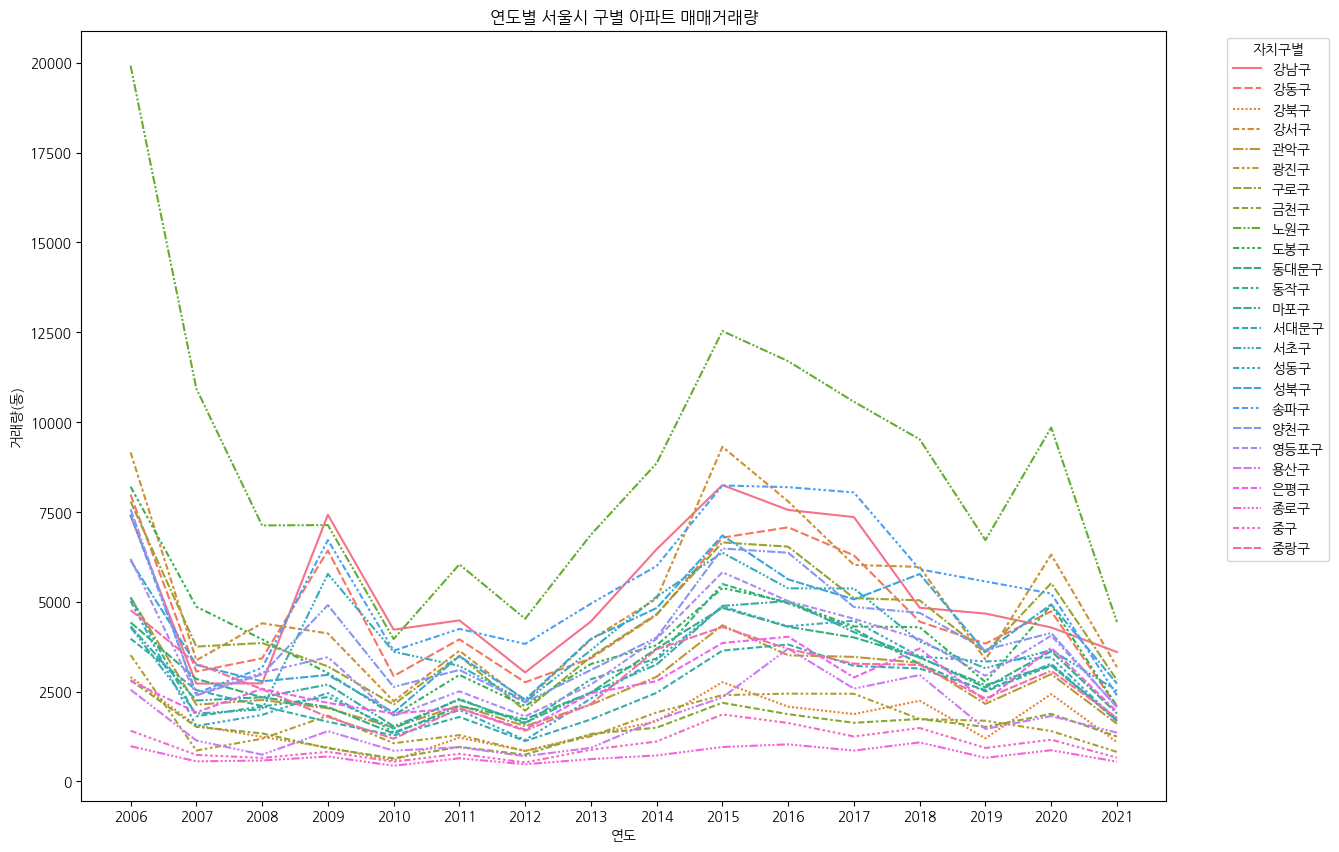

In [19]:
# 연도별 그래프 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.lineplot(data=apart_trade.T)
plt.title('연도별 서울시 구별 아파트 매매거래량')
plt.xlabel('연도')
plt.ylabel('거래량(동)')
plt.legend(title='자치구별', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [20]:
#15년 기준 지도 시각화

my_map5 = folium.Map(location=[37.57, 126.992], zoom_start=11.3)

folium.Choropleth(
    geo_data=geo_str,
    data=apart_trade["2015"],
    columns=[apart_trade.index, apart_trade["2015"]],
    key_on="feature.id",
    fill_color="PuRd",
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name="15년 서울시 구별 아파트매매 거래량",
).add_to(my_map5)

for idx, row in seoul_district.iterrows():
        text_location = [row['Y'], row['X']]
        text = row['시군구명']
        folium.Marker(location=text_location, popup=text,
                      icon=folium.DivIcon(icon_size=(50,20),icon_anchor=(16,0),
                              html=f"""<div style="font-family: arial; font-size: 1.2em ;color: black">{text}</div>""")
                      ).add_to(my_map5)

my_map5

In [76]:
#11. 15년~22년 서울시 구별 아파트 비율
apart2= pd.read_csv("../data/15_22_apart_per.csv")
apart_per = pd.pivot_table(data=apart2, index=apart2.columns[0], values=apart2.columns[1:17])
apart_per2 = pd.pivot_table(data=apart2, index=apart2.columns[0], values=apart2.columns[7:8])
apart_per2.sort_values(by='2021',ascending=False)

2021
구              
노원구   86.462449
성동구   74.797052
강남구   73.168467
서초구   70.501809
영등포구  70.247110
강동구   64.637023
동대문구  63.777844
양천구   63.272149
구로구   62.397017
중구    62.210827
송파구   60.949516
도봉구   60.490557
강서구   58.612620
마포구   58.597675
성북구   57.776620
동작구   54.580287
서대문구  54.135301
용산구   51.005427
중랑구   49.482042
금천구   46.395377
관악구   43.451789
은평구   41.294110
강북구   35.644930
광진구   35.623195
종로구   33.646155

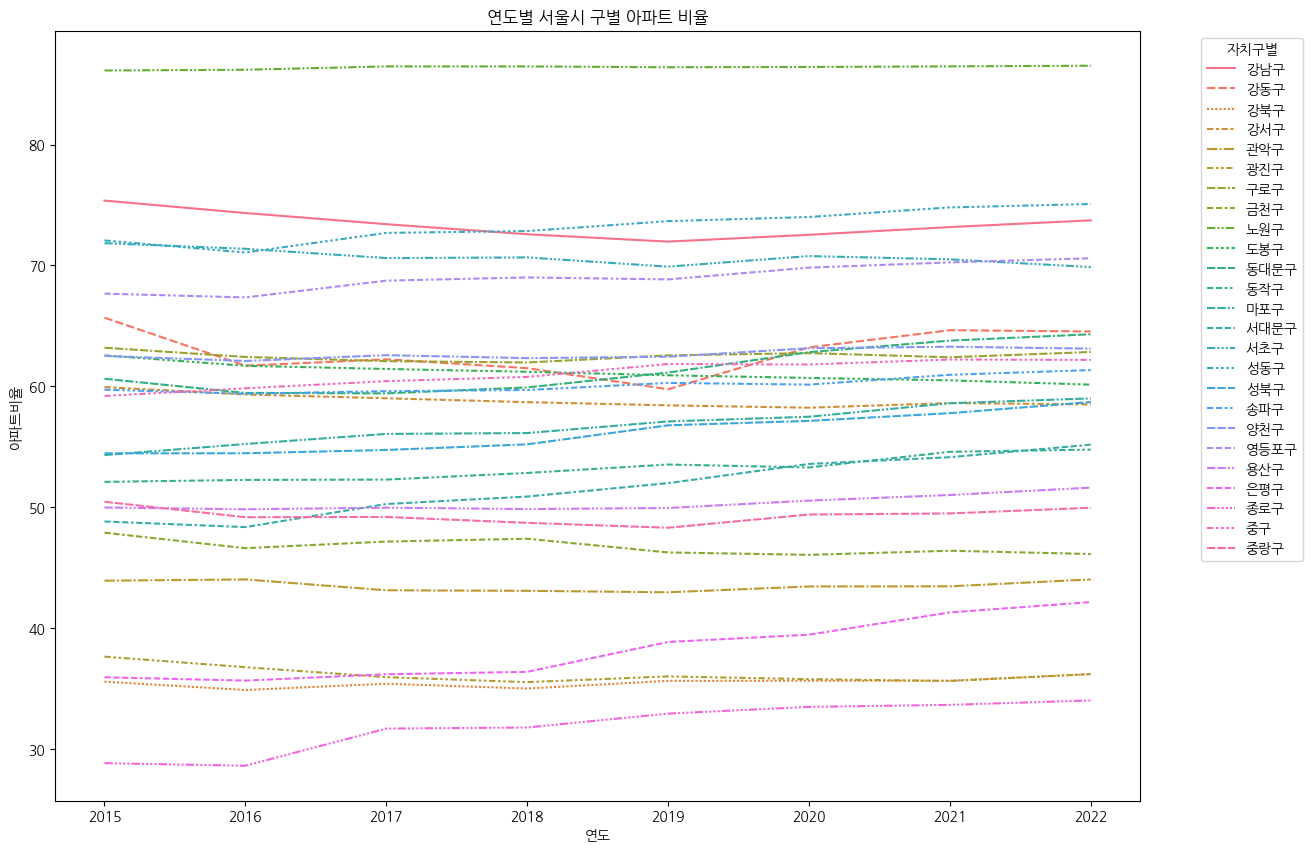

In [22]:
# 구별 그래프 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.lineplot(data=apart_per.T)
plt.title('연도별 서울시 구별 아파트 비율')
plt.xlabel('연도')
plt.ylabel('아파트비율')
plt.legend(title='자치구별', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [23]:
#21년 기준 지도 시각화

my_map6 = folium.Map(location=[37.57, 126.992], zoom_start=11.3)

folium.Choropleth(
    geo_data=geo_str,
    data=apart_per["2021"],
    columns=[apart_per.index, apart_per["2021"]],
    key_on="feature.id",
    fill_color="PuRd",
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name="21년 서울시 구별 아파트 비율",
).add_to(my_map6)

for idx, row in seoul_district.iterrows():
        text_location = [row['Y'], row['X']]
        text = row['시군구명']
        folium.Marker(location=text_location, popup=text,
                      icon=folium.DivIcon(icon_size=(50,20),icon_anchor=(16,0),
                              html=f"""<div style="font-family: arial; font-size: 1.2em ;color: black">{text}</div>""")
                      ).add_to(my_map6)

my_map6

In [48]:
#12. 17년~21년 서울시 구별 아파트 세대수 
gagu= pd.read_csv("../data/gaguone.csv")
gaguone = pd.pivot_table(data=gagu, index=gagu.columns[0], values=gagu.columns[1:6])
gaguone

2017      2018      2019      2020      2021
구                                                     
강남구   100157.0  101469.0  106985.0  106616.0  111277.0
강동구    51734.0   57467.0   69026.0   75443.0   81302.0
강북구    24035.0   24035.0   25063.0   25063.0   32082.0
강서구    81553.0   81544.0  101324.0  101813.0  105189.0
관악구    41508.0   40697.0   40839.0   40839.0   48957.0
광진구    24211.0   25065.0   25065.0   25065.0   25805.0
구로구    64105.0   63289.0   65827.0   66580.0   72629.0
금천구    24349.0   25453.0   25785.0   25785.0   29790.0
노원구   137257.0  134131.0  134990.0  137145.0  158296.0
도봉구    60999.0   61186.0   61337.0   61582.0   61694.0
동대문구   45628.0   53898.0   55655.0   55600.0   61387.0
동작구    50698.0   51366.0   53877.0   54836.0   59068.0
마포구    54232.0   55731.0   57171.0   57171.0   64907.0
서대문구   37448.0   38750.0   44264.0   46728.0   47187.0
서초구    72188.0   72379.0   77337.0   76866.0   81666.0
성동구    53062.0   55615.0   55615.0   55615.0   60442.0
성북구    60894.0   61488.0   62978.0   62978.0   75546.0
송파구   101639.0  112294.0  110500.0  111602.0  118906.0
양천구    69176.0   69586.0   69942.0   69942.0   88020.0
영등포구   58989.0   59181.0   54908.0   54908.0   68676.0
용산구    24626.0   24710.0   27455.0   27242.0   29126.0
은평구    39896.0   41008.0   44606.0   44578.0   55606.0
종로구     9364.0    9364.0   10625.0   10605.0   10734.0
중구     12443.0   12642.0   12819.0   12818.0   16686.0
중랑구    41102.0   41102.0   41828.0   41828.0   49220.0

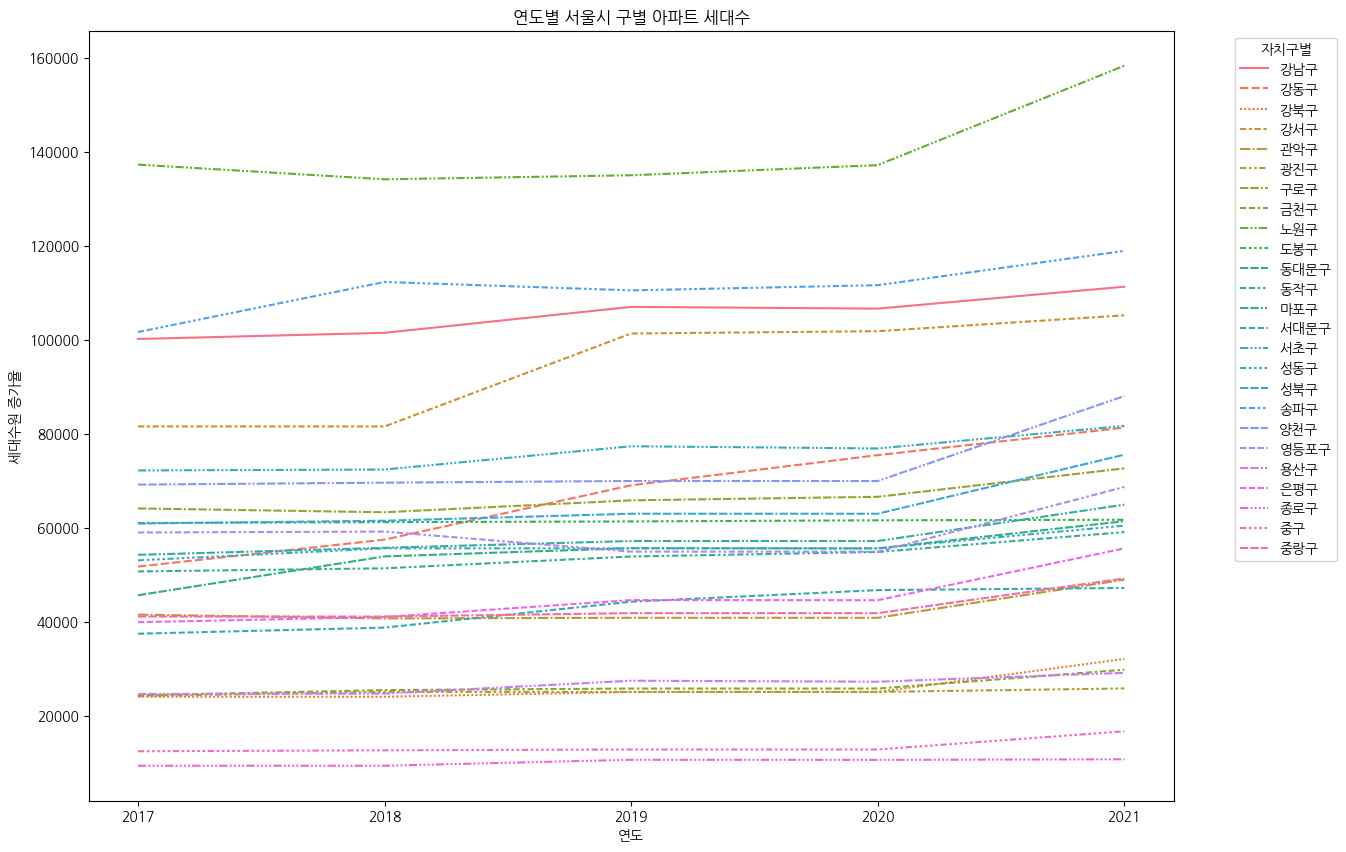

In [47]:
# 구별 그래프 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.lineplot(data=gaguone.T)
plt.title('연도별 서울시 구별 아파트 세대수')
plt.xlabel('연도')
plt.ylabel('세대수원 증가율')
plt.legend(title='자치구별', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [80]:
# 구별 증감율 그래프
work_plus5 = pd.pivot_table(data=gagu, index=gagu.columns[0],  values=gagu.columns[6:7])
work_pl5 = work_plus5.sort_values(by='증감율',ascending=False)
work_pl5

증감율
구              
강동구   57.153903
은평구   39.377381
동대문구  34.538003
중구    34.099494
강북구   33.480341
강서구   28.982380
양천구   27.240662
서대문구  26.006729
성북구   24.061484
금천구   22.345887
중랑구   19.750864
마포구   19.683950
용산구   18.273370
관악구   17.945938
송파구   16.988558
동작구   16.509527
영등포구  16.421706
노원구   15.328180
종로구   14.630500
성동구   13.908258
구로구   13.296935
서초구   13.129606
강남구   11.102569
광진구    6.583784
도봉구    1.139363

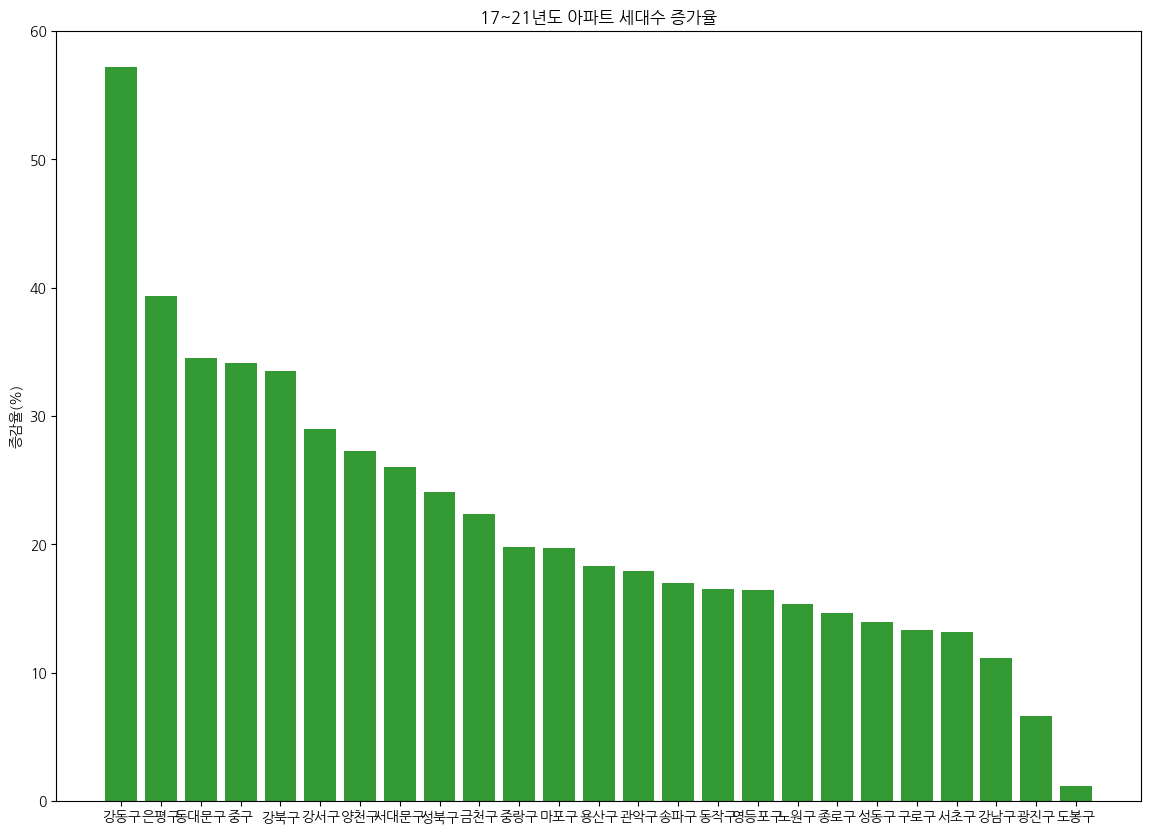

In [78]:
plt.figure(figsize=(14, 10))
plt.bar(x=work_pl5.index , height= work_pl5['증감율'] , color= 'green' , alpha = 0.8)
plt.title('17~21년도 아파트 세대수 증가율')
plt.ylabel('증감율(%)')
plt.show()

In [79]:
my_map7 = folium.Map(location=[37.57, 126.992], zoom_start=11.3)

folium.Choropleth(
    geo_data=geo_str,
    data=work_pl5["증감율"],
    columns=[work_pl5.index, work_pl5["증감율"]],
    key_on="feature.id",
    fill_color="PuRd",
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name="17~21년 아파트 세대수 증가율",
).add_to(my_map7)

for idx, row in seoul_district.iterrows():
        text_location = [row['Y'], row['X']]
        text = row['시군구명']
        folium.Marker(location=text_location, popup=text,
                      icon=folium.DivIcon(icon_size=(50,20),icon_anchor=(16,0),
                              html=f"""<div style="font-family: arial; font-size: 1.2em ;color: black">{text}</div>""")
                      ).add_to(my_map7)

my_map7

In [32]:
#13. 2021년 기준 서울시 구별 아파트 연식비율
apart3= pd.read_csv("../data/2021_apart_year.csv")
apart_year = pd.pivot_table(data=apart3, index=apart3.columns[0], values=apart3.columns[1:])
apart_year

0년~4년     10년~14년    15년~19년    20년~29년    30년~39년    40년~49년  \
구                                                                        
강남구    8.815075   7.845988  16.093732  25.848476  19.470827   9.322732   
강동구   30.795488  20.728272   8.692501  19.343036  14.199544   0.088842   
강북구    4.975095  14.131263  36.445942  18.989159  23.773806   0.208028   
강서구    4.936751   9.575917  19.080936  50.847047   3.501996   0.097019   
관악구    3.883687   8.567074  34.935371  43.165938   6.761812   1.060987   
광진구    8.170289  12.948436   9.540789  43.846702  20.352857   2.778208   
구로구   10.083095  10.768439  15.841994  41.178390  17.170006   0.943917   
금천구   10.693910   1.689818  26.367357  23.874488  18.925958   6.095746   
노원구    2.026388   1.047635   7.644042  42.935508  45.595612   0.075144   
도봉구    0.691839   0.779472  17.388230  37.300904  41.685628   0.166041   
동대문구  10.184340  11.823430  19.624201  39.361389   5.359934   2.569301   
동작구   11.053057   8.849887  23.374313  34.988677   8.225493   0.732773   
마포구   11.856538  13.577914  24.041740  24.021199  10.830834   0.293058   
서대문구  17.135952   7.093656   9.921450  37.375629   7.252769   1.448137   
서초구   13.987192  13.094733  18.344083  13.102753  14.083426   7.469612   
성동구    9.480909   5.986939  13.853536  40.370529  10.872778   0.000000   
성북구   12.574587  18.540293  35.781672  25.278563   2.209660   1.366748   
송파구   16.061389  24.633279   7.285945  15.718094  22.611470   7.410339   
양천구    9.652510   6.537677  18.550171  27.049803  33.946467   0.211488   
영등포구  17.203455   3.687145  15.539273  31.808522  14.839653  10.240382   
용산구   10.614203  16.013162  11.483411  34.373458   5.678640   8.475459   
은평구   23.706867  38.593332  11.195719  13.456130   7.072786   0.269260   
종로구   19.515297  16.745566  10.068537  36.705999   9.411432   2.239808   
중구    12.352156  22.232961  27.672695  24.621474   0.322150   3.506834   
중랑구    8.879417   5.422660  14.698261  50.604604   9.275602   0.565173   

        50년 이상     5년~9년   
구                          
강남구   0.000000  12.603170  
강동구   0.000000   6.152317  
강북구   0.000000   1.476707  
강서구   0.000000  11.960334  
관악구   0.213781   1.411350  
광진구   0.000000   2.362717  
구로구   0.000000   4.014159  
금천구   0.000000  12.352722  
노원구   0.000000   0.675671  
도봉구   0.000000   1.987885  
동대문구  0.058815  11.018589  
동작구   0.059851  12.715950  
마포구   0.098599  15.280117  
서대문구  0.000000  19.772407  
서초구   4.643303  15.274898  
성동구   0.000000  19.435308  
성북구   0.208530   4.039947  
송파구   0.000000   6.279483  
양천구   0.000000   4.051885  
영등포구  2.396920   4.284650  
용산구   8.631752   4.729915  
은평구   0.056596   5.649311  
종로구   4.133399   1.179962  
중구    3.677114   5.614616  
중랑구   0.000000  10.554283

Text(0.5, 0.98, '서울시 각 구의 아파트 연식')

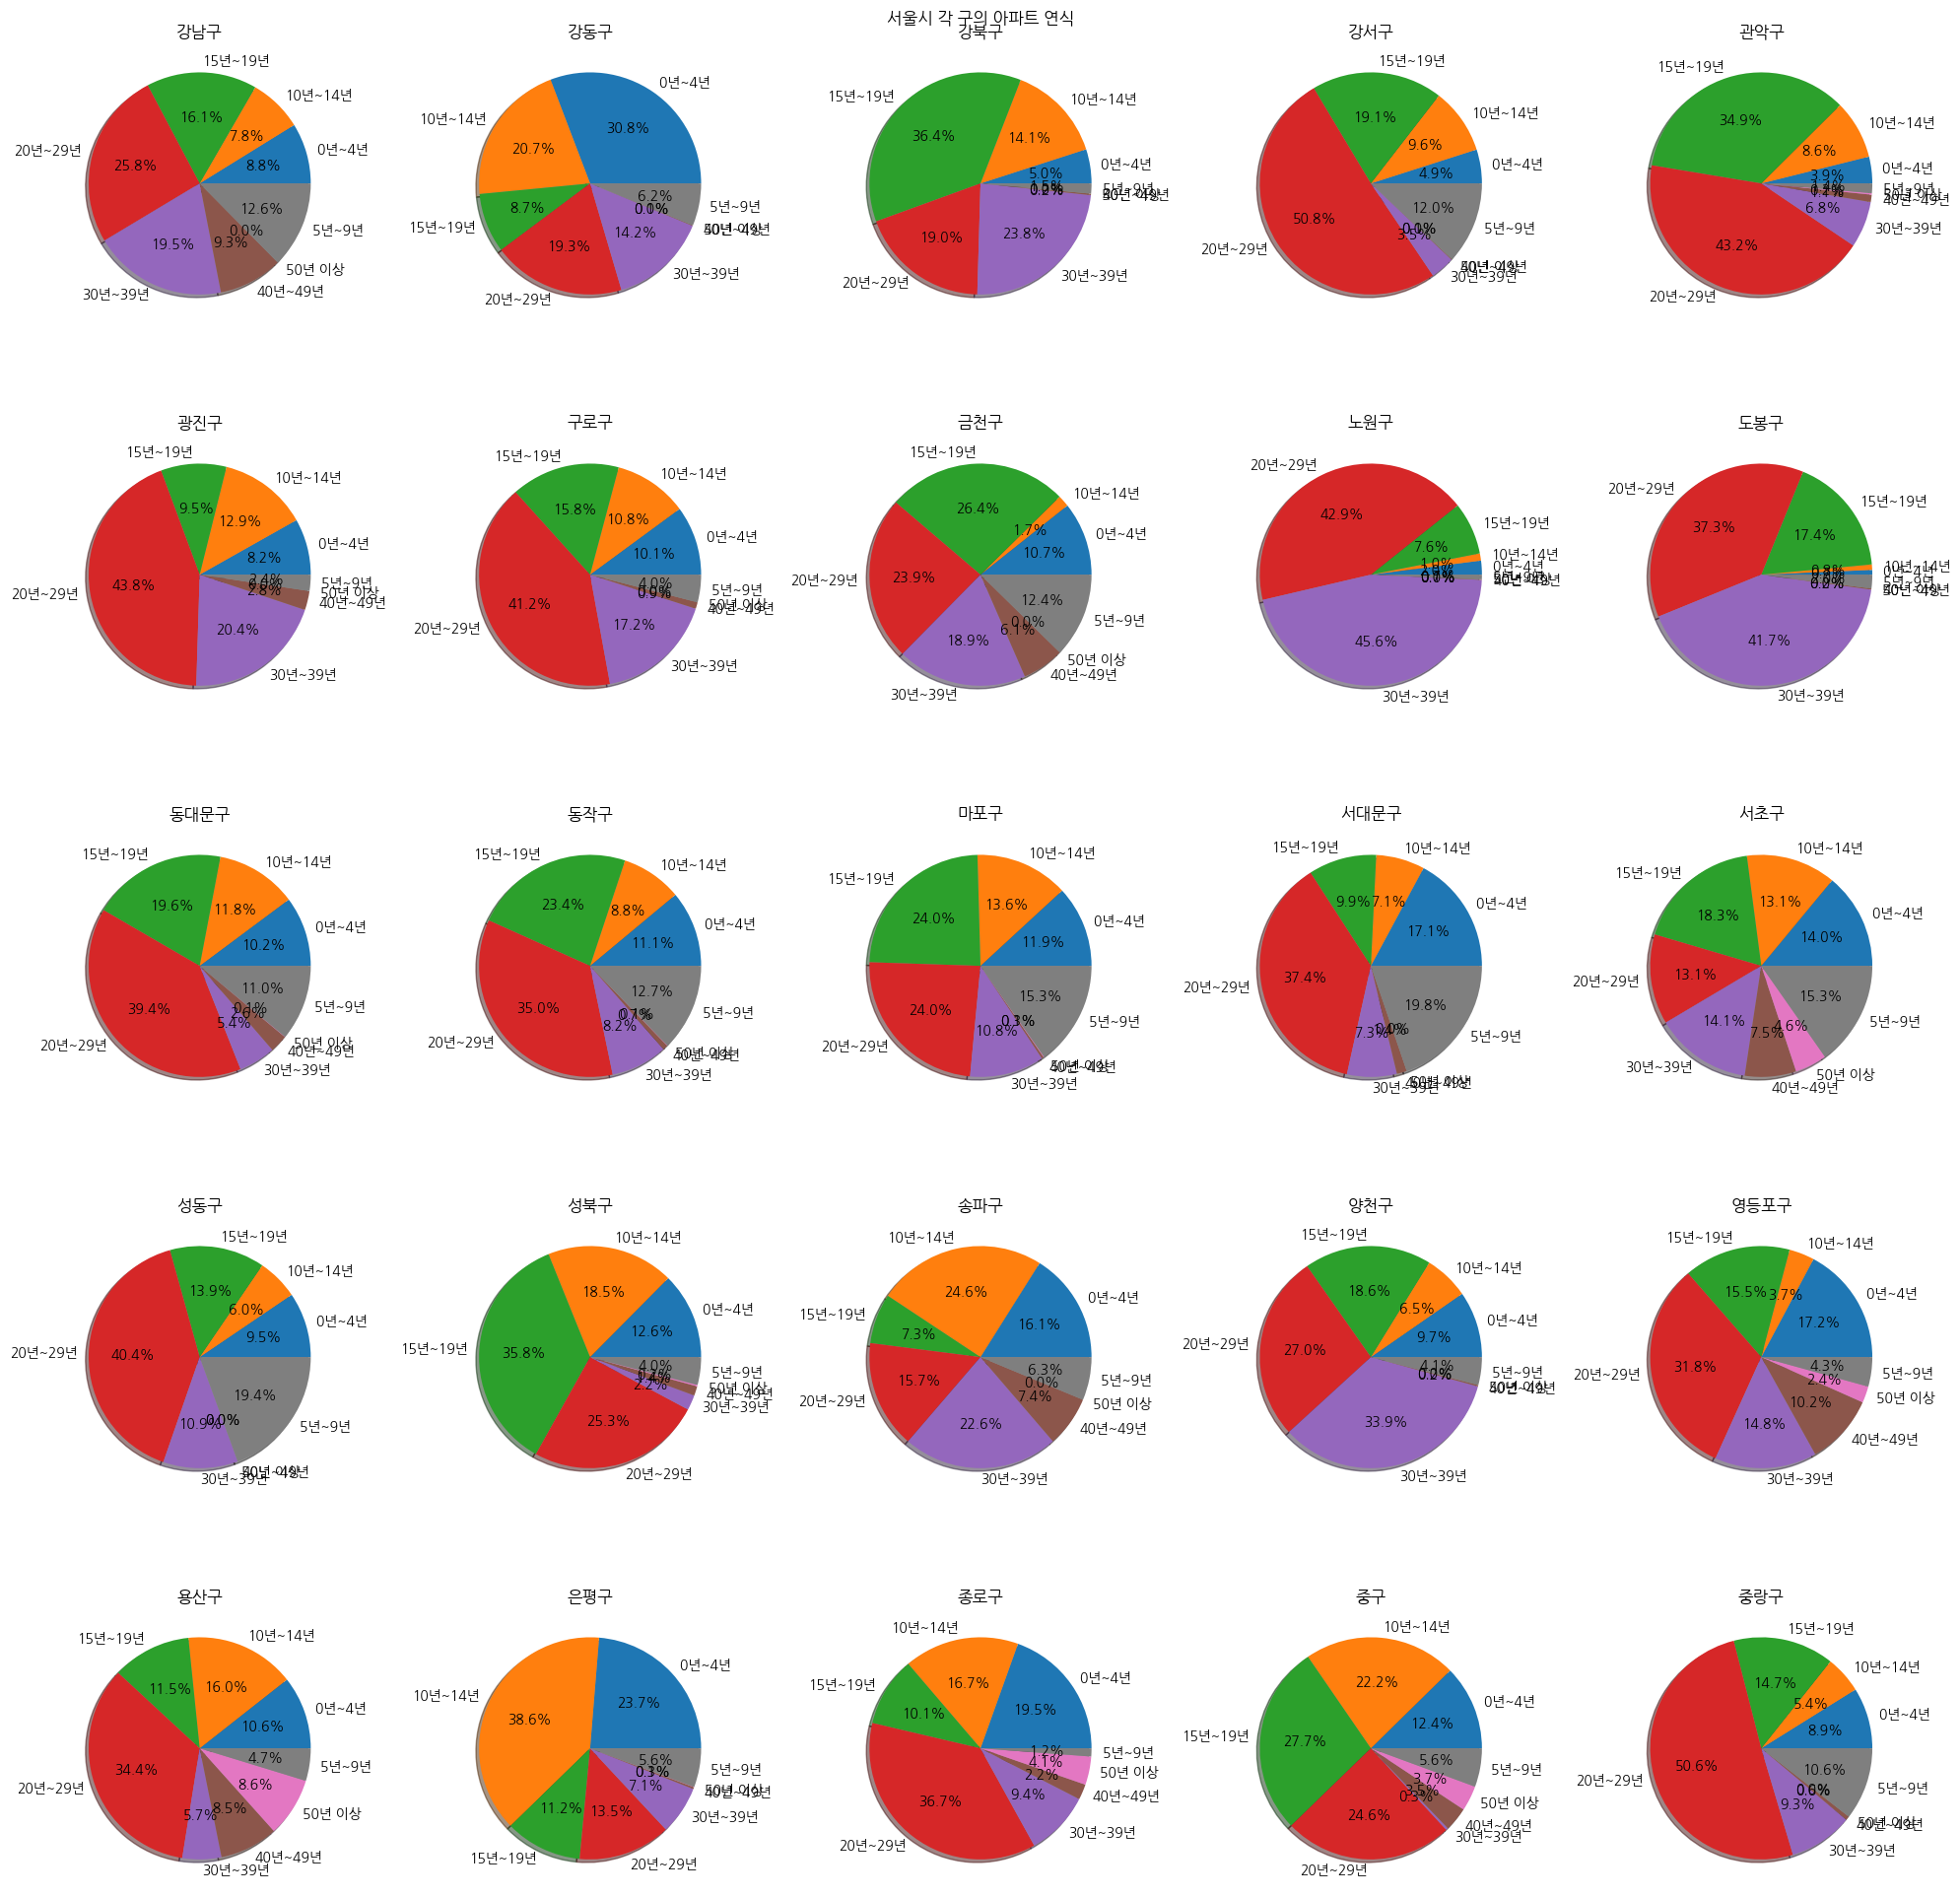

In [33]:
# 구별 파이차트 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(5, 5, figsize=(20, 20))

for i, (idx, row) in enumerate(apart_year.iterrows()):
    row_idx, col_idx = divmod(i, 5)  
    ax = axes[row_idx, col_idx]
    
    ax.pie(row, labels=row.index, autopct='%1.1f%%', shadow=True)
    ax.set_title(idx)

plt.tight_layout()
plt.suptitle('서울시 각 구의 아파트 연식')

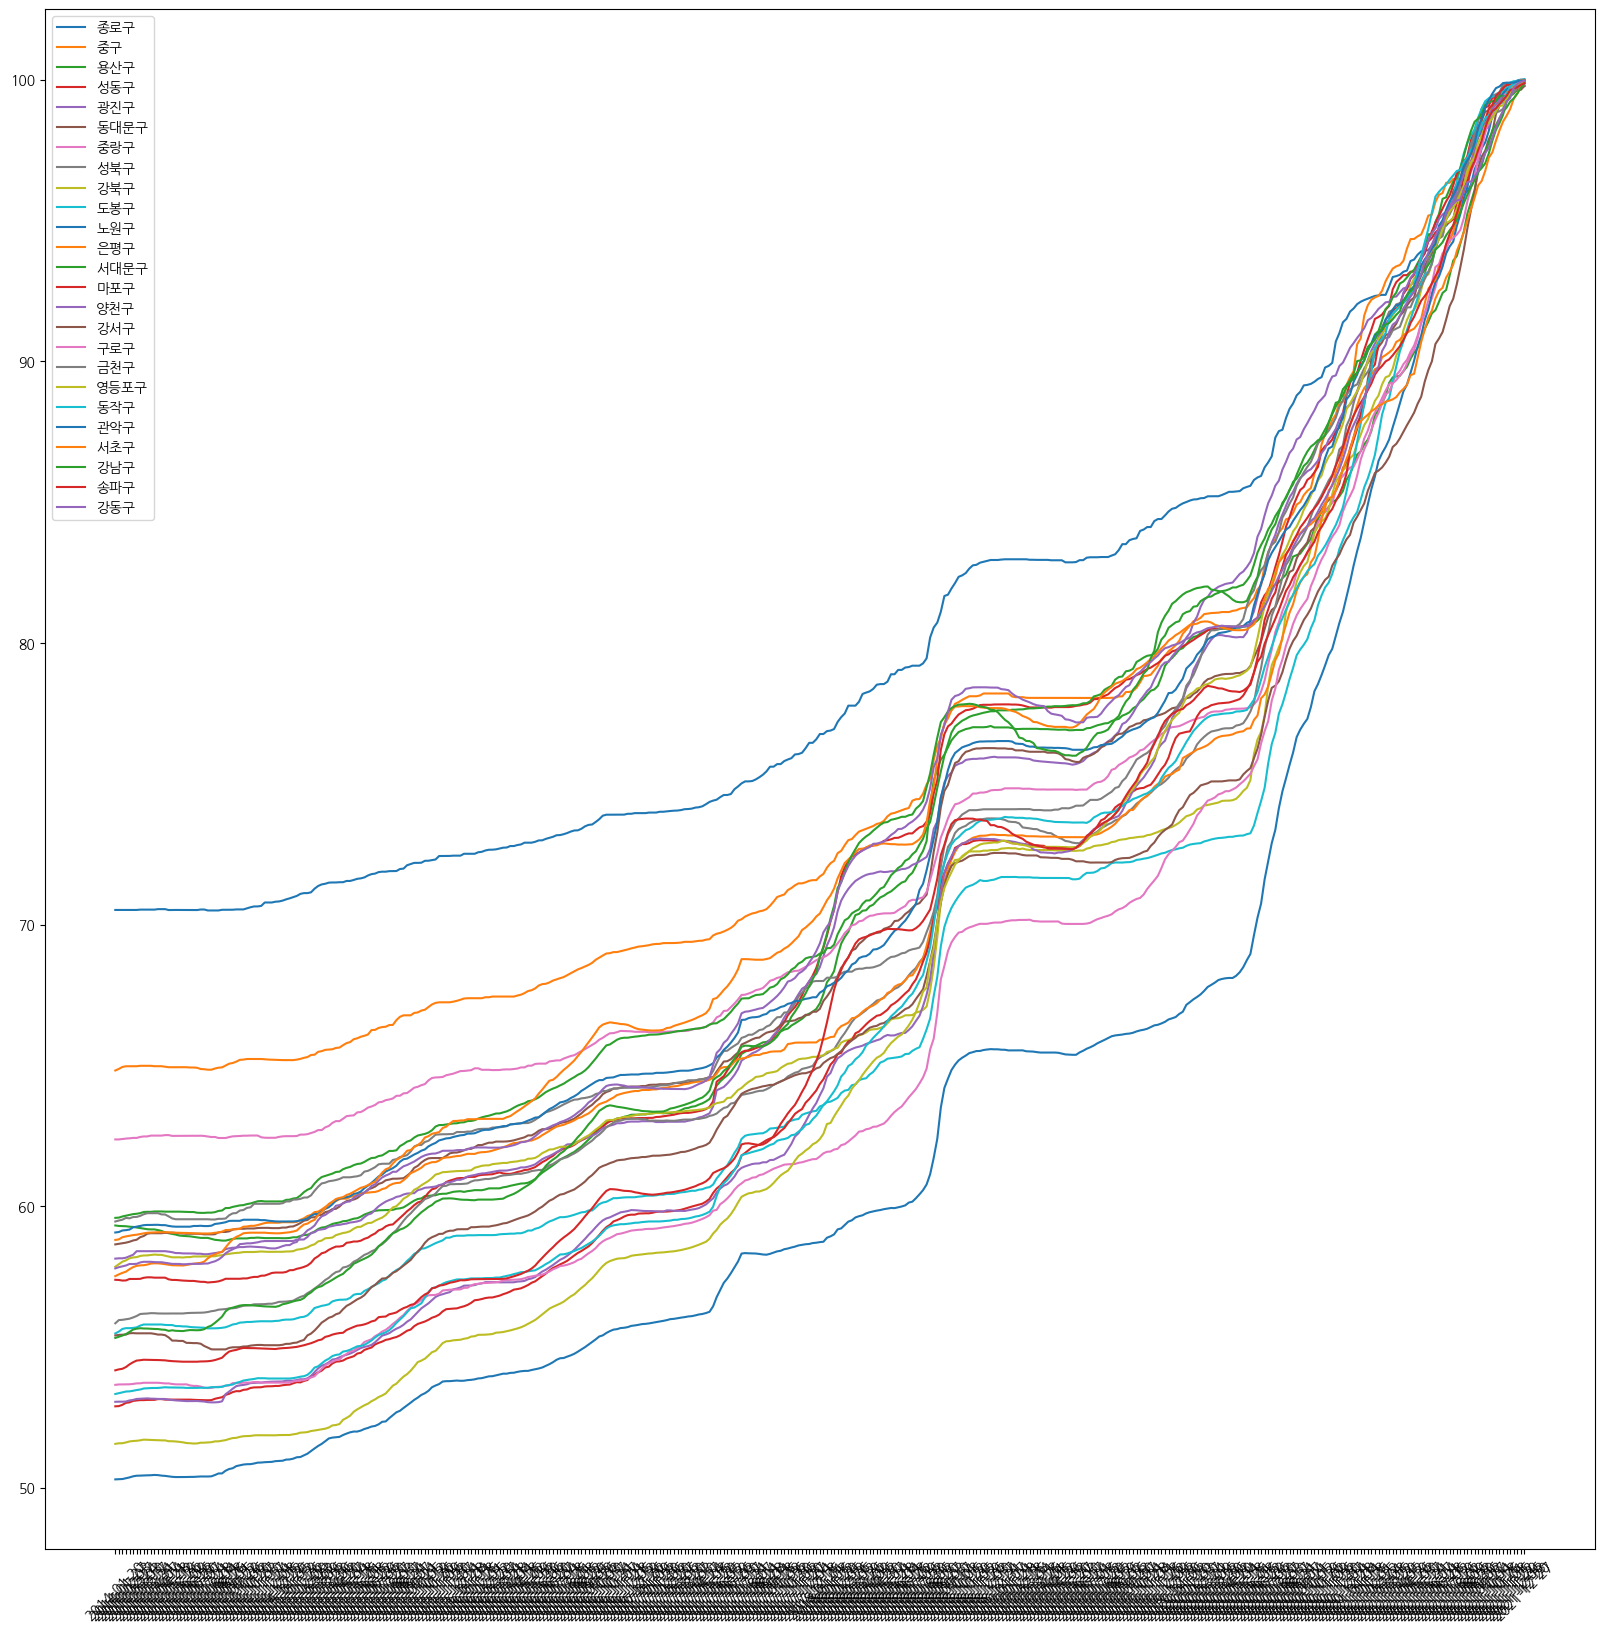

In [34]:
#13. 아파트 매매가격지수 변동 그래프
index_data2 = pd.read_excel("../data/seoul_apart_buy .xlsx")
index_data2.set_index("지역명",drop=True,inplace=True)
newname = []
oldname = index_data2.columns
for i in oldname:
    if (type(i) == type("str")):
        newname.append(i.split(" ")[0])
    else:
        newname.append(i.strftime("%Y-%m-%d"))
index_data2.columns = newname
plt.figure(figsize=(20,20))
for i in range(0,25):
    plt.plot(index_data2.iloc[i])
plt.legend(index_data2.index)
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_15633/1144284780.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(total2["증감율"][n],
/tmp/ipykernel_15633/1144284780.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total2["상승률"][n] ,


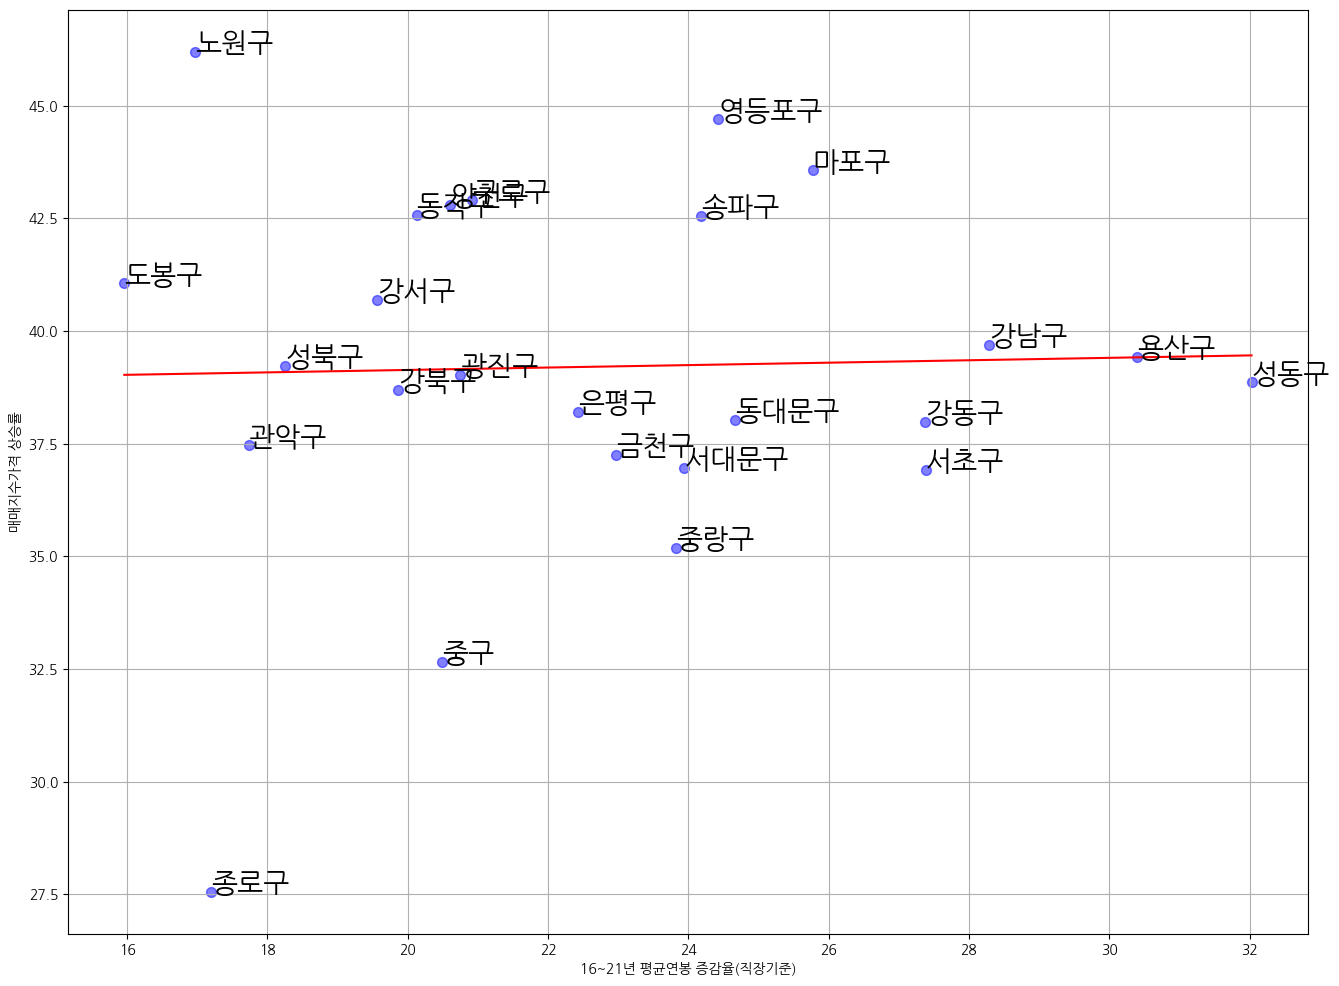

In [35]:
#1. 평균연봉(직장기준) 연관성
up = pd.read_excel("../data/seoul_apart_buy  per.xlsx")
up = pd.pivot_table(data=up, index=up.columns[0], values=up.columns[1:17])

total2 = work_pl2.merge(up,left_on='구',right_on='구')

from scipy.stats import linregress

def drawGraph2():
    plt.figure(figsize=(16,12))
    plt.scatter(x=total2["증감율"], y=total2["상승률"], color = 'blue' , alpha =0.5 , s=50 )
    plt.xlabel("16~21년 평균연봉 증감율(직장기준)")
    plt.ylabel("매매지수가격 상승률")
    plt.grid()

    x=np.array(total2["증감율"])
    y=np.array(total2["상승률"])

    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)

    trendline_x = np.linspace(min(x), max(x), 100)
    trendline_y = polynomial(trendline_x)
    plt.plot(trendline_x, trendline_y, color='red', label='2차 추세선')

    for n in range(25):
        plt.text(total2["증감율"][n],
                total2["상승률"][n] ,
                total2.index[n], fontsize=20 )
        
    plt.show()

drawGraph2()

/tmp/ipykernel_15633/2675459255.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(total3["2021"][n],
/tmp/ipykernel_15633/2675459255.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total3["상승률"][n] ,


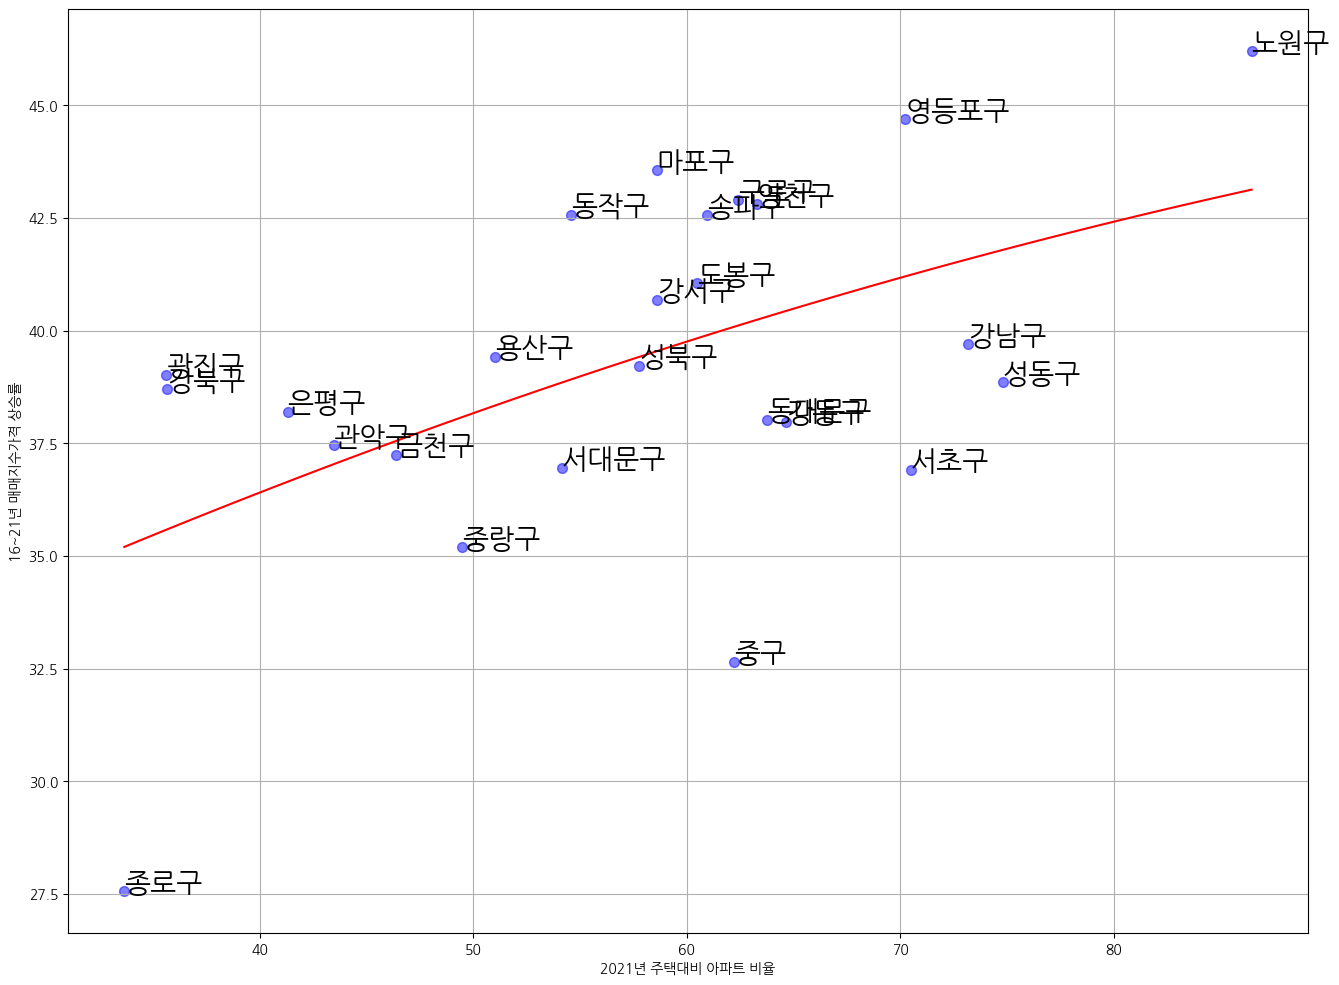

In [41]:
#2. 주택비율 연관성
total3 = up.merge(apart_per,left_on='구',right_on='구')

def drawGraph3():
    plt.figure(figsize=(16,12))
    plt.scatter(x=total3["2021"], y=total3["상승률"], color = 'blue' , alpha =0.5 , s=50 )
    plt.xlabel("2021년 주택대비 아파트 비율")
    plt.ylabel("16~21년 매매지수가격 상승률")
    plt.grid()

    x=np.array(total3["2021"])
    y=np.array(total3["상승률"])

    coefficients = np.polyfit(x, y, 2)
    polynomial = np.poly1d(coefficients)

    trendline_x = np.linspace(min(x), max(x), 100)
    trendline_y = polynomial(trendline_x)
    plt.plot(trendline_x, trendline_y, color='red', label='2차 추세선')

    for n in range(25):
        plt.text(total3["2021"][n],
                total3["상승률"][n] ,
                total3.index[n], fontsize=20 )
        
    plt.show()

drawGraph3()

/tmp/ipykernel_15633/2202717515.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(total4["증감율"][n],
/tmp/ipykernel_15633/2202717515.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total4["상승률"][n] ,


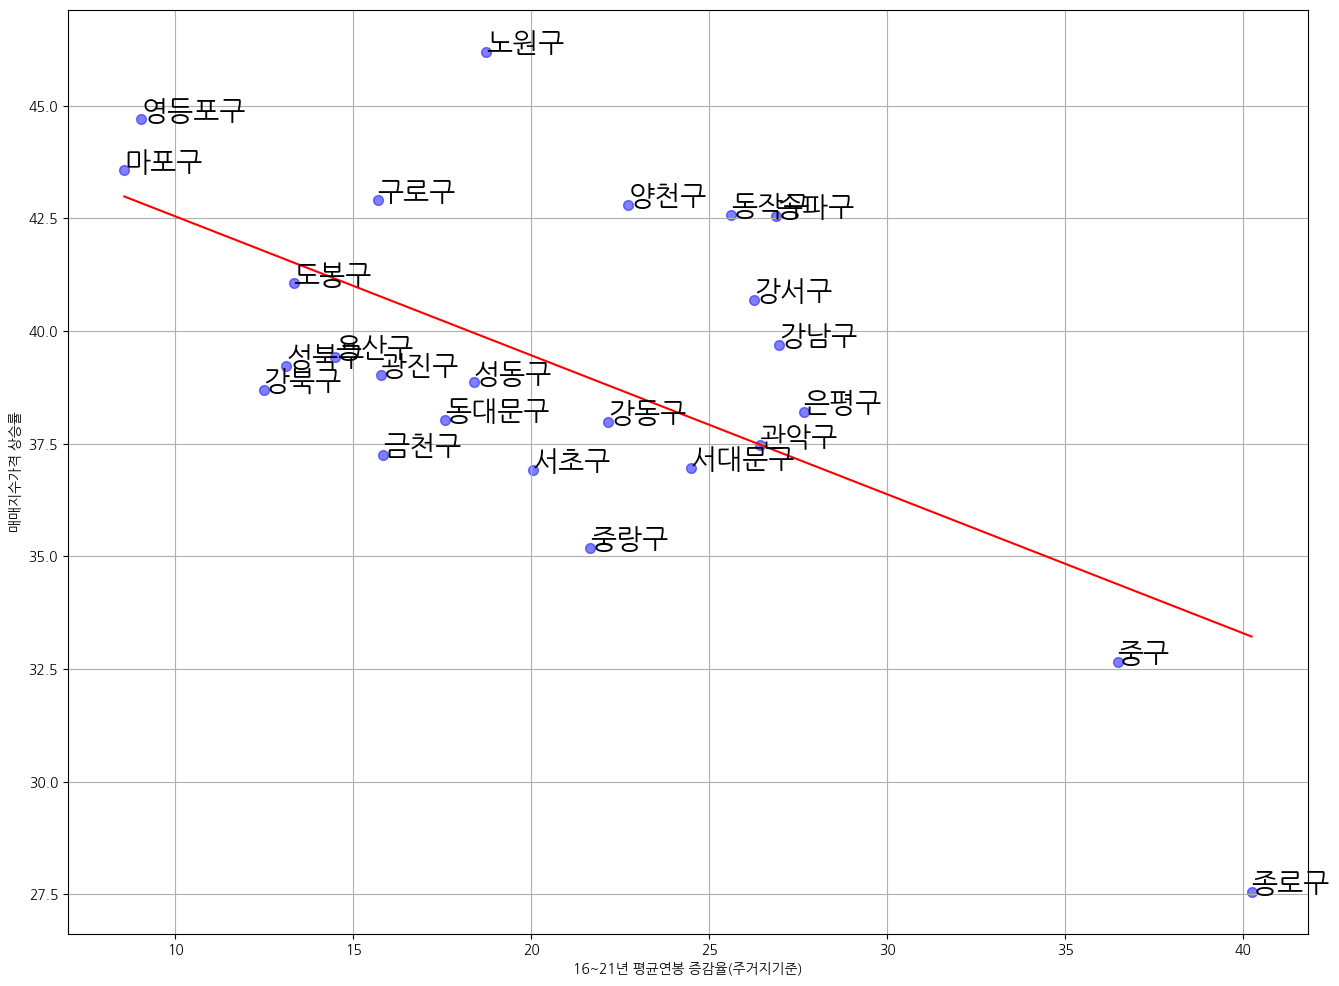

In [42]:
#3. 평균연봉(주거지기준) 연관성
total4 = work_pl.merge(up,left_on='구',right_on='구')

def drawGraph4():
    plt.figure(figsize=(16,12))
    plt.scatter(x=total4["증감율"], y=total4["상승률"], color = 'blue' , alpha =0.5 , s=50 )
    plt.xlabel("16~21년 평균연봉 증감율(주거지기준)")
    plt.ylabel("매매지수가격 상승률")
    plt.grid()

    x=np.array(total4["증감율"])
    y=np.array(total4["상승률"])

    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)

    trendline_x = np.linspace(min(x), max(x), 100)
    trendline_y = polynomial(trendline_x)
    plt.plot(trendline_x, trendline_y, color='red', label='2차 추세선')

    for n in range(25):
        plt.text(total4["증감율"][n],
                total4["상승률"][n] ,
                total4.index[n], fontsize=20 )
        
    plt.show()

drawGraph4()

/tmp/ipykernel_15633/1663209677.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(total5["증감"][n],
/tmp/ipykernel_15633/1663209677.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total5["상승률"][n] ,


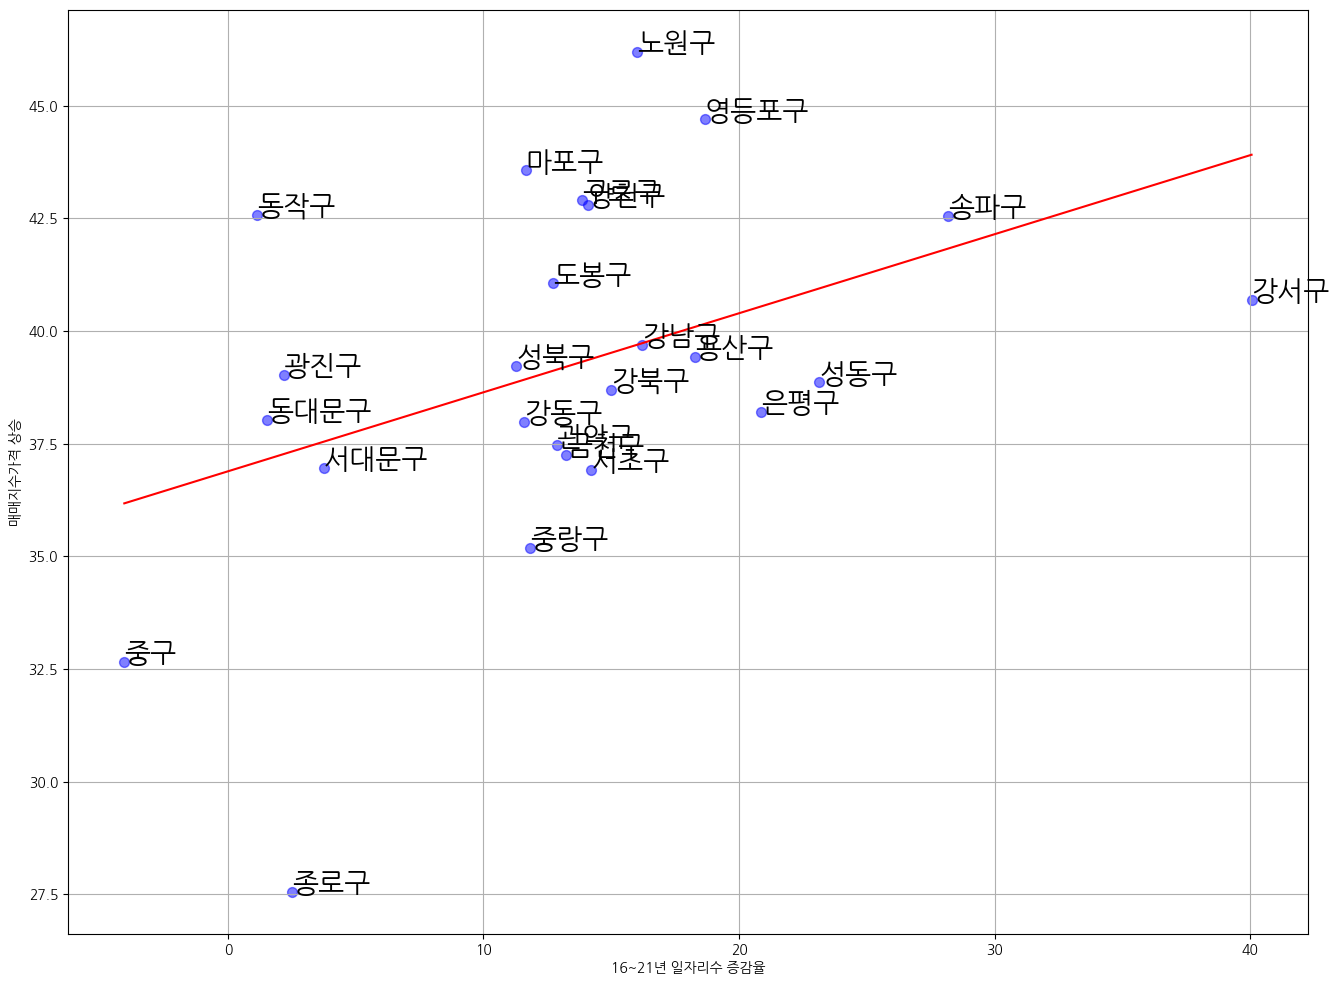

In [43]:
#4. 일자리수 연관성
work_plus4 = pd.pivot_table(data=work_pop, index=work_pop.columns[0], values=work_pop.columns[13:14])
work_pl4 = work_plus4.sort_values(by='증감',ascending=False)

total5 = work_pl4.merge(up,left_on='구',right_on='구')


def drawGraph4():
    plt.figure(figsize=(16,12))
    plt.scatter(x=total5["증감"], y=total5["상승률"], color = 'blue' , alpha =0.5 , s=50 )
    plt.xlabel("16~21년 일자리수 증감율")
    plt.ylabel("매매지수가격 상승")
    plt.grid()

    x=np.array(total5["증감"])
    y=np.array(total5["상승률"])

    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)

    trendline_x = np.linspace(min(x), max(x), 100)
    trendline_y = polynomial(trendline_x)
    plt.plot(trendline_x, trendline_y, color='red', label='2차 추세선')

    for n in range(25):
        plt.text(total5["증감"][n],
                total5["상승률"][n] ,
                total5.index[n], fontsize=20 )
        
    plt.show()

drawGraph4()

/tmp/ipykernel_15633/3492734325.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(total6["증감율"][n],
/tmp/ipykernel_15633/3492734325.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total6["상승률"][n] ,


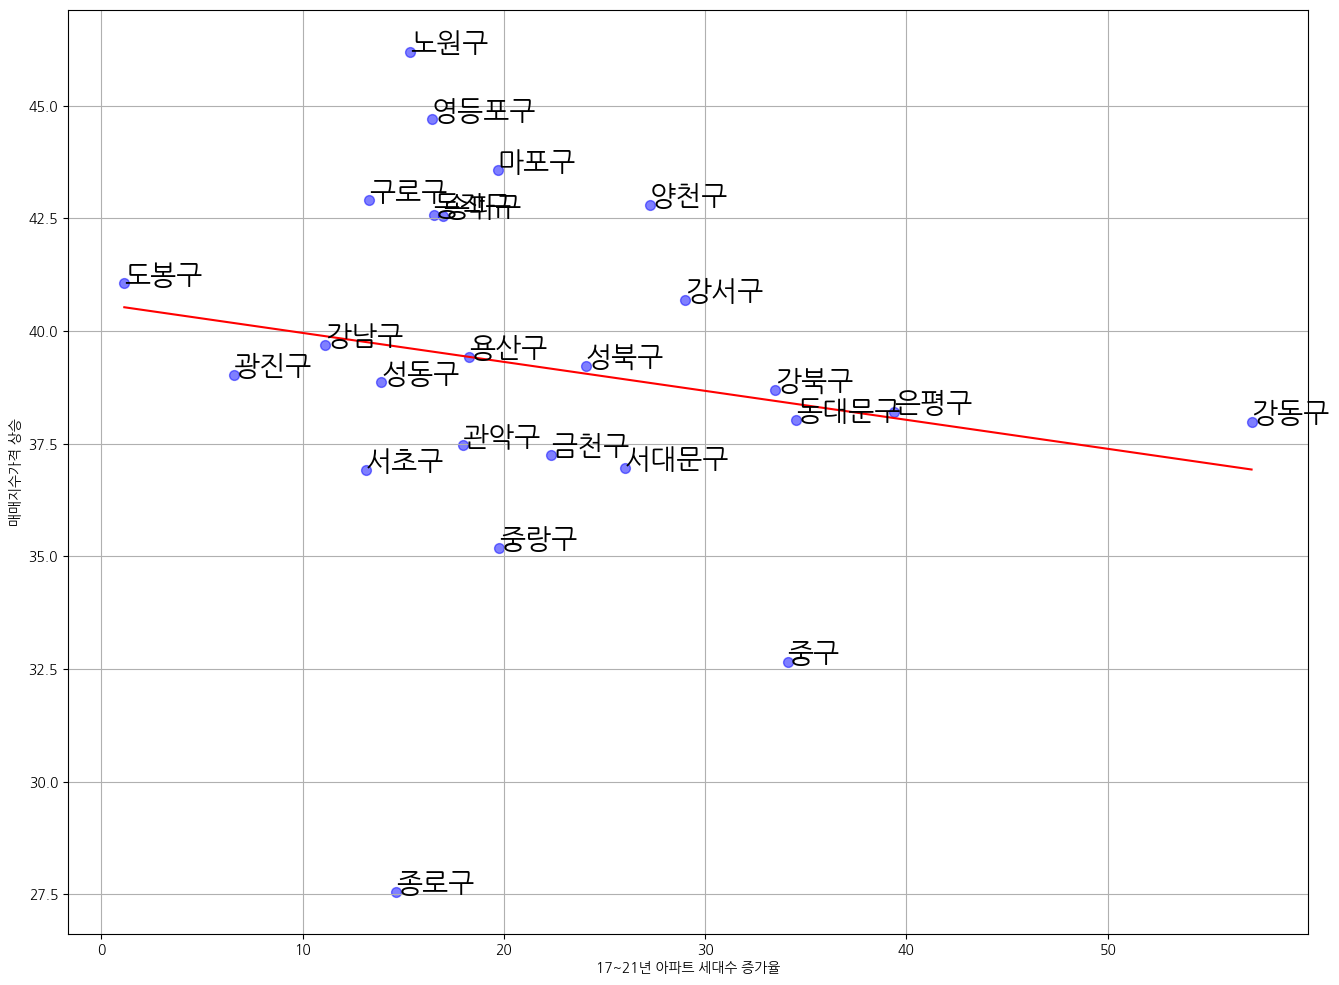

In [45]:
#5. 아파트 세대수 증가율과 연관성
total6 = work_pl5.merge(up,left_on='구',right_on='구')

def drawGraph5():
    plt.figure(figsize=(16,12))
    plt.scatter(x=total6["증감율"], y=total6["상승률"], color = 'blue' , alpha =0.5 , s=50 )
    plt.xlabel("17~21년 아파트 세대수 증가율")
    plt.ylabel("매매지수가격 상승")
    plt.grid()

    x=np.array(total6["증감율"])
    y=np.array(total6["상승률"])

    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)

    trendline_x = np.linspace(min(x), max(x), 100)
    trendline_y = polynomial(trendline_x)
    plt.plot(trendline_x, trendline_y, color='red', label='2차 추세선')

    for n in range(25):
        plt.text(total6["증감율"][n],
                total6["상승률"][n] ,
                total6.index[n], fontsize=20 )
        
    plt.show()

drawGraph5()